In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline 

In [2]:
### Load Data
data = pd.read_csv('./Data/train.csv').to_numpy()

In [3]:
print('train: ' + str(data.shape))

train: (3751, 1777)


# Dataset Exploration

In [4]:
values, counts = np.unique(data[:,0], return_counts=True)

Text(0, 0.5, 'Frequency')

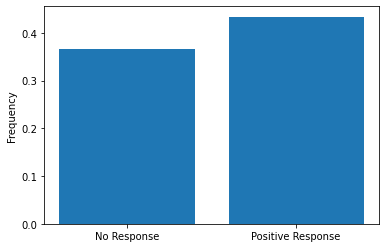

In [38]:
plt.bar(['No Response', 'Positive Response'], counts/data.shape[0])
plt.ylabel('Frequency')

In [6]:
# Split data into train and test
train_x, test_x, train_y, test_y = train_test_split(data[:,1:], data[:,0], test_size=0.2, stratify=data[:,0])

Text(0, 0.5, 'Frequency')

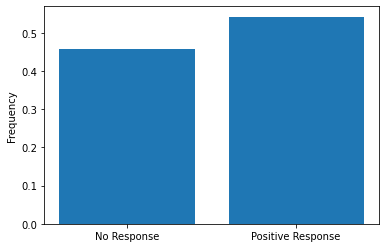

In [39]:
values, counts = np.unique(train_y, return_counts=True)

plt.bar(['No Response', 'Positive Response'], counts/train_y.shape[0])
plt.ylabel('Frequency')

In [41]:
# Create a function to save results
import json

def save_results(results, filename):
    with open(filename + '.json', 'w') as fp:
        json.dump(results, fp)
        
def load_results(file_name):
    with open(file_name) as f:
        temp_results = json.load(f)
    return temp_results

## Decision Trees

In [9]:
### Create a function to fit and evaluate DT at given alphas
def evaluate_dtc(train_x, train_y, test_x, test_y, alphas, results):
    
    tested_alphas = [results[i][0] for i in list(results.keys())]
    
    i = len(list(results.keys()))
    
    for alpha in alphas:
        
        # Skip if alpha has already been tested
        if alpha in tested_alphas:
            continue
        
        # Initialize model
        model = DecisionTreeClassifier(ccp_alpha = alpha)
        
        # Fit model
        model = model.fit(train_x, train_y)
        
        # Evaluate performance
        train_accuracy = model.score(train_x, train_y)
        test_accuracy = model.score(test_x, test_y)
        
        # Save results
        results[i] = (alpha, train_accuracy, test_accuracy)
        
        # Update i
        i += 1
        
    return results

In [10]:
### Evaluate model without any pruning
# Train model
model = DecisionTreeClassifier()
model = model.fit(train_x, train_y)

# Evaluate performance
train_accuracy = model.score(train_x, train_y)
test_accuracy = model.score(test_x, test_y)

print('Training accuracy: ' + str(train_accuracy))
print('Test accuracy: ' + str(test_accuracy))

Training accuracy: 1.0
Test accuracy: 0.7350199733688415


In [11]:
# Initialize model
model = DecisionTreeClassifier()

# Compute path for pruning
path = model.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [12]:
print('Max alpha: ' + str(np.max(ccp_alphas)))
print('Min alpha: ' + str(np.min(ccp_alphas)))

Max alpha: 0.11247197501181116
Min alpha: 0.0


In [13]:
### Run first search over alpha range
alpha_list = [0+np.max(ccp_alphas)/i for i in range(6)]
results_dtc = {}
results_dtc = evaluate_dtc(train_x, train_y, test_x, test_y, alpha_list, results_dtc)

<ipython-input-13-990f456d4956>:2: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_list = [0+np.max(ccp_alphas)/i for i in range(6)]


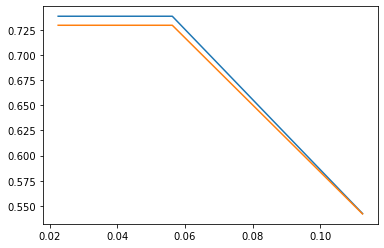

In [14]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1] for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2] for i in list(results_dtc.keys())]

plt.plot(alpha_list, train_acc_list)
plt.plot(alpha_list, test_acc_list)

In [15]:
max_index = np.argmax(test_acc_list)

print('Optimized alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index]*100, 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index]*100, 2)) + '%')

Optimized alpha: 0.05623598750590558
Training accuracy: 73.87%
Test accuracy: 72.97%


In [16]:
# Save decision tree results
save_results(results_dtc, 'results_dtc')

In [42]:
results_dtc = load_results('results_dtc.json')

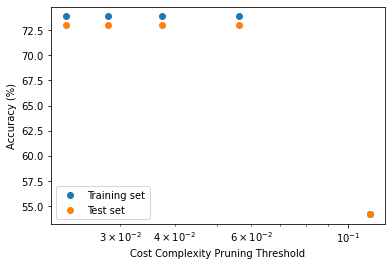

In [64]:
alpha_list = [results_dtc[i][0] for i in list(results_dtc.keys())]
train_acc_list = [results_dtc[i][1]*100 for i in list(results_dtc.keys())]
test_acc_list = [results_dtc[i][2]*100 for i in list(results_dtc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Cost Complexity Pruning Threshold')
plt.ylabel('Accuracy (%)')
plt.xscale('log')

In [63]:
max_index = np.argmax(test_acc_list)

print('Optimized alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Optimized alpha: 0.022494395002362232
Training accuracy: 73.87%
Test accuracy: 72.97%


# Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
### Create a function to fit and evaluate DT at given alphas
def evaluate_nn(train_x, train_y, test_x, test_y, hyperparameter_dic, resutls_nn):
    
    layers = hyperparameter_dic['layers']
    sizes = hyperparameter_dic['sizes']
    activations = hyperparameter_dic['activations']
    alphas = hyperparameter_dic['alphas']
    
    number_models = len(layers)*len(sizes)*len(activations)*len(alphas)
    i = len(list(resutls_nn.keys()))
    
    for number_layers in layers:
        for layer_size in sizes:
            for activation in activations:
                for alpha in alphas:
                    
                    for r_i in list(results_nn.keys()):
                        if alpha == results_nn[r_i][0]:
                            if layer_size == results_nn[r_i][4]:
                                if number_layers == results_nn[r_i][3]:
                                    if activation == results_nn[r_i][5]:
                                        continue
                        
                    print('Training model {} of {}...'.format(i+1, number_models))
                    
                    # Initialize model
                    model = MLPClassifier(
                        hidden_layer_sizes = [layer_size]*number_layers,
                        activation = activation,
                        alpha = alpha,
                        max_iter = 10000,
                        learning_rate = 'invscaling',
                        verbose = True
                    )
                                
                    # Fit model
                    model.fit(train_x, train_y)
                                
                    # Evaluate performance
                    train_accuracy = model.score(train_x, train_y)
                    test_accuracy = model.score(test_x, test_y)

                    # Save resutls_nn
                    resutls_nn[i] = (alpha, train_accuracy, test_accuracy, number_layers, layer_size, activation)

                    # Update i
                    i += 1

    return resutls_nn

In [19]:
layers = [1, 2]
sizes = [8, 16, 32, 64]
activations = ['logistic', 'tanh']
alphas = [0.0001, 0.001, 0.01]

hyperparameters_dic = {
    'layers': layers,
    'sizes': sizes,
    'activations': activations,
    'alphas': alphas
}

results_nn = {}

results_nn = evaluate_nn(train_x, train_y, test_x, test_y, hyperparameters_dic, results_nn)

Training model 1 of 48...
Iteration 1, loss = 0.68049718
Iteration 2, loss = 0.65500752
Iteration 3, loss = 0.63657511
Iteration 4, loss = 0.62164698
Iteration 5, loss = 0.60770979
Iteration 6, loss = 0.59518180
Iteration 7, loss = 0.58358536
Iteration 8, loss = 0.57264956
Iteration 9, loss = 0.56264675
Iteration 10, loss = 0.55270862
Iteration 11, loss = 0.54332816
Iteration 12, loss = 0.53422945
Iteration 13, loss = 0.52542404
Iteration 14, loss = 0.51818481
Iteration 15, loss = 0.50970478
Iteration 16, loss = 0.50283763
Iteration 17, loss = 0.49520790
Iteration 18, loss = 0.48943934
Iteration 19, loss = 0.48310891
Iteration 20, loss = 0.47617735
Iteration 21, loss = 0.47072120
Iteration 22, loss = 0.46489248
Iteration 23, loss = 0.45990855
Iteration 24, loss = 0.45527329
Iteration 25, loss = 0.45051951
Iteration 26, loss = 0.44697219
Iteration 27, loss = 0.44083579
Iteration 28, loss = 0.43632096
Iteration 29, loss = 0.43278376
Iteration 30, loss = 0.42925668
Iteration 31, loss = 0.

Iteration 257, loss = 0.22341731
Iteration 258, loss = 0.22313110
Iteration 259, loss = 0.22460381
Iteration 260, loss = 0.22396018
Iteration 261, loss = 0.22242069
Iteration 262, loss = 0.22242855
Iteration 263, loss = 0.22123697
Iteration 264, loss = 0.22369808
Iteration 265, loss = 0.22142937
Iteration 266, loss = 0.21987193
Iteration 267, loss = 0.21949137
Iteration 268, loss = 0.21973023
Iteration 269, loss = 0.21858411
Iteration 270, loss = 0.21843909
Iteration 271, loss = 0.21800752
Iteration 272, loss = 0.21687848
Iteration 273, loss = 0.21718603
Iteration 274, loss = 0.21627684
Iteration 275, loss = 0.21455326
Iteration 276, loss = 0.21408440
Iteration 277, loss = 0.21361328
Iteration 278, loss = 0.21370143
Iteration 279, loss = 0.21316376
Iteration 280, loss = 0.21425731
Iteration 281, loss = 0.21281208
Iteration 282, loss = 0.21111649
Iteration 283, loss = 0.21220416
Iteration 284, loss = 0.21271665
Iteration 285, loss = 0.21042153
Iteration 286, loss = 0.21131716
Iteration 

Iteration 509, loss = 0.12031758
Iteration 510, loss = 0.12062339
Iteration 511, loss = 0.11936311
Iteration 512, loss = 0.11974995
Iteration 513, loss = 0.11979164
Iteration 514, loss = 0.11853327
Iteration 515, loss = 0.11805501
Iteration 516, loss = 0.11799868
Iteration 517, loss = 0.11765738
Iteration 518, loss = 0.11808511
Iteration 519, loss = 0.11986438
Iteration 520, loss = 0.11743817
Iteration 521, loss = 0.11618130
Iteration 522, loss = 0.11560614
Iteration 523, loss = 0.11540222
Iteration 524, loss = 0.11532002
Iteration 525, loss = 0.11549923
Iteration 526, loss = 0.11522095
Iteration 527, loss = 0.11442061
Iteration 528, loss = 0.11424522
Iteration 529, loss = 0.11404178
Iteration 530, loss = 0.11342050
Iteration 531, loss = 0.11309900
Iteration 532, loss = 0.11254776
Iteration 533, loss = 0.11257338
Iteration 534, loss = 0.11291680
Iteration 535, loss = 0.11188229
Iteration 536, loss = 0.11161229
Iteration 537, loss = 0.11105085
Iteration 538, loss = 0.11126624
Iteration 

Iteration 763, loss = 0.05717932
Iteration 764, loss = 0.05727832
Iteration 765, loss = 0.05756918
Iteration 766, loss = 0.05705099
Iteration 767, loss = 0.05783279
Iteration 768, loss = 0.05667361
Iteration 769, loss = 0.05632890
Iteration 770, loss = 0.05633713
Iteration 771, loss = 0.05727628
Iteration 772, loss = 0.05687697
Iteration 773, loss = 0.05567720
Iteration 774, loss = 0.05555527
Iteration 775, loss = 0.05551533
Iteration 776, loss = 0.05602899
Iteration 777, loss = 0.05531755
Iteration 778, loss = 0.05572728
Iteration 779, loss = 0.05493170
Iteration 780, loss = 0.05509396
Iteration 781, loss = 0.05496098
Iteration 782, loss = 0.05489239
Iteration 783, loss = 0.05472665
Iteration 784, loss = 0.05382879
Iteration 785, loss = 0.05400366
Iteration 786, loss = 0.05358698
Iteration 787, loss = 0.05363580
Iteration 788, loss = 0.05351321
Iteration 789, loss = 0.05320649
Iteration 790, loss = 0.05361299
Iteration 791, loss = 0.05362173
Iteration 792, loss = 0.05282355
Iteration 

Iteration 1017, loss = 0.02794366
Iteration 1018, loss = 0.02797822
Iteration 1019, loss = 0.02774512
Iteration 1020, loss = 0.02762594
Iteration 1021, loss = 0.02762840
Iteration 1022, loss = 0.02740983
Iteration 1023, loss = 0.02764161
Iteration 1024, loss = 0.02777674
Iteration 1025, loss = 0.02718797
Iteration 1026, loss = 0.02755478
Iteration 1027, loss = 0.02726230
Iteration 1028, loss = 0.02713813
Iteration 1029, loss = 0.02703453
Iteration 1030, loss = 0.02685923
Iteration 1031, loss = 0.02677380
Iteration 1032, loss = 0.02682462
Iteration 1033, loss = 0.02670580
Iteration 1034, loss = 0.02650536
Iteration 1035, loss = 0.02657207
Iteration 1036, loss = 0.02657822
Iteration 1037, loss = 0.02672623
Iteration 1038, loss = 0.02675031
Iteration 1039, loss = 0.02649805
Iteration 1040, loss = 0.02637787
Iteration 1041, loss = 0.02613251
Iteration 1042, loss = 0.02652010
Iteration 1043, loss = 0.02635122
Iteration 1044, loss = 0.02645750
Iteration 1045, loss = 0.02589374
Iteration 1046

Iteration 1258, loss = 0.01482399
Iteration 1259, loss = 0.01465208
Iteration 1260, loss = 0.01448193
Iteration 1261, loss = 0.01436669
Iteration 1262, loss = 0.01424246
Iteration 1263, loss = 0.01422108
Iteration 1264, loss = 0.01430940
Iteration 1265, loss = 0.01438812
Iteration 1266, loss = 0.01428117
Iteration 1267, loss = 0.01411968
Iteration 1268, loss = 0.01413295
Iteration 1269, loss = 0.01399135
Iteration 1270, loss = 0.01399091
Iteration 1271, loss = 0.01379933
Iteration 1272, loss = 0.01390521
Iteration 1273, loss = 0.01382875
Iteration 1274, loss = 0.01385322
Iteration 1275, loss = 0.01375535
Iteration 1276, loss = 0.01369423
Iteration 1277, loss = 0.01370187
Iteration 1278, loss = 0.01367095
Iteration 1279, loss = 0.01379500
Iteration 1280, loss = 0.01396424
Iteration 1281, loss = 0.01385888
Iteration 1282, loss = 0.01359758
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training model 2 of 48...
Iteration 1, loss = 0.68042846
Ite

Iteration 230, loss = 0.23933934
Iteration 231, loss = 0.23812248
Iteration 232, loss = 0.23802954
Iteration 233, loss = 0.23690947
Iteration 234, loss = 0.23656779
Iteration 235, loss = 0.23758090
Iteration 236, loss = 0.23646360
Iteration 237, loss = 0.23638766
Iteration 238, loss = 0.23526668
Iteration 239, loss = 0.23433581
Iteration 240, loss = 0.23400935
Iteration 241, loss = 0.23343139
Iteration 242, loss = 0.23280037
Iteration 243, loss = 0.23335884
Iteration 244, loss = 0.23267194
Iteration 245, loss = 0.23181469
Iteration 246, loss = 0.23008496
Iteration 247, loss = 0.23036301
Iteration 248, loss = 0.22934712
Iteration 249, loss = 0.22870211
Iteration 250, loss = 0.22841145
Iteration 251, loss = 0.22907010
Iteration 252, loss = 0.22982917
Iteration 253, loss = 0.22793272
Iteration 254, loss = 0.22724436
Iteration 255, loss = 0.22653176
Iteration 256, loss = 0.22549566
Iteration 257, loss = 0.22625123
Iteration 258, loss = 0.22513767
Iteration 259, loss = 0.22416308
Iteration 

Iteration 479, loss = 0.13469042
Iteration 480, loss = 0.13415564
Iteration 481, loss = 0.13282801
Iteration 482, loss = 0.13297264
Iteration 483, loss = 0.13298366
Iteration 484, loss = 0.13181339
Iteration 485, loss = 0.13178160
Iteration 486, loss = 0.13144967
Iteration 487, loss = 0.13191024
Iteration 488, loss = 0.13120045
Iteration 489, loss = 0.13121894
Iteration 490, loss = 0.13152672
Iteration 491, loss = 0.13096821
Iteration 492, loss = 0.12978837
Iteration 493, loss = 0.12901977
Iteration 494, loss = 0.12881920
Iteration 495, loss = 0.12995327
Iteration 496, loss = 0.12896271
Iteration 497, loss = 0.12862924
Iteration 498, loss = 0.12781186
Iteration 499, loss = 0.12745449
Iteration 500, loss = 0.12694759
Iteration 501, loss = 0.12681203
Iteration 502, loss = 0.12825625
Iteration 503, loss = 0.12686447
Iteration 504, loss = 0.12647075
Iteration 505, loss = 0.12712816
Iteration 506, loss = 0.12662351
Iteration 507, loss = 0.12631709
Iteration 508, loss = 0.12513403
Iteration 

Iteration 732, loss = 0.07198320
Iteration 733, loss = 0.07259800
Iteration 734, loss = 0.07146688
Iteration 735, loss = 0.07200475
Iteration 736, loss = 0.07151066
Iteration 737, loss = 0.07118377
Iteration 738, loss = 0.07149230
Iteration 739, loss = 0.07103682
Iteration 740, loss = 0.07085142
Iteration 741, loss = 0.07070897
Iteration 742, loss = 0.07080117
Iteration 743, loss = 0.07068319
Iteration 744, loss = 0.07012024
Iteration 745, loss = 0.06960258
Iteration 746, loss = 0.06998516
Iteration 747, loss = 0.07117108
Iteration 748, loss = 0.07007812
Iteration 749, loss = 0.06938984
Iteration 750, loss = 0.06998981
Iteration 751, loss = 0.06925649
Iteration 752, loss = 0.06866227
Iteration 753, loss = 0.06880762
Iteration 754, loss = 0.06849950
Iteration 755, loss = 0.06821340
Iteration 756, loss = 0.06815537
Iteration 757, loss = 0.06823753
Iteration 758, loss = 0.06814259
Iteration 759, loss = 0.06769594
Iteration 760, loss = 0.06770068
Iteration 761, loss = 0.06826771
Iteration 

Iteration 983, loss = 0.04260928
Iteration 984, loss = 0.04246155
Iteration 985, loss = 0.04244508
Iteration 986, loss = 0.04218731
Iteration 987, loss = 0.04227324
Iteration 988, loss = 0.04270553
Iteration 989, loss = 0.04220841
Iteration 990, loss = 0.04215729
Iteration 991, loss = 0.04229377
Iteration 992, loss = 0.04202815
Iteration 993, loss = 0.04238437
Iteration 994, loss = 0.04204930
Iteration 995, loss = 0.04179886
Iteration 996, loss = 0.04146297
Iteration 997, loss = 0.04232471
Iteration 998, loss = 0.04305717
Iteration 999, loss = 0.04183700
Iteration 1000, loss = 0.04109759
Iteration 1001, loss = 0.04136971
Iteration 1002, loss = 0.04103097
Iteration 1003, loss = 0.04072771
Iteration 1004, loss = 0.04070470
Iteration 1005, loss = 0.04091230
Iteration 1006, loss = 0.04057634
Iteration 1007, loss = 0.04058645
Iteration 1008, loss = 0.04079215
Iteration 1009, loss = 0.04051672
Iteration 1010, loss = 0.04064651
Iteration 1011, loss = 0.04024824
Iteration 1012, loss = 0.040270

Iteration 39, loss = 0.42081976
Iteration 40, loss = 0.41885654
Iteration 41, loss = 0.41588072
Iteration 42, loss = 0.41406549
Iteration 43, loss = 0.41125664
Iteration 44, loss = 0.40897622
Iteration 45, loss = 0.40636788
Iteration 46, loss = 0.40410824
Iteration 47, loss = 0.40290324
Iteration 48, loss = 0.39985665
Iteration 49, loss = 0.39776561
Iteration 50, loss = 0.39596073
Iteration 51, loss = 0.39581388
Iteration 52, loss = 0.39346973
Iteration 53, loss = 0.39114492
Iteration 54, loss = 0.38970439
Iteration 55, loss = 0.38814476
Iteration 56, loss = 0.38628911
Iteration 57, loss = 0.38438237
Iteration 58, loss = 0.38292561
Iteration 59, loss = 0.38103912
Iteration 60, loss = 0.38032516
Iteration 61, loss = 0.37860964
Iteration 62, loss = 0.37703306
Iteration 63, loss = 0.37741884
Iteration 64, loss = 0.37582602
Iteration 65, loss = 0.37358037
Iteration 66, loss = 0.37183183
Iteration 67, loss = 0.37046005
Iteration 68, loss = 0.36985166
Iteration 69, loss = 0.36835205
Iteratio

Iteration 294, loss = 0.23269344
Iteration 295, loss = 0.23142079
Iteration 296, loss = 0.23141073
Iteration 297, loss = 0.23115247
Iteration 298, loss = 0.23250325
Iteration 299, loss = 0.23069521
Iteration 300, loss = 0.23025180
Iteration 301, loss = 0.22970155
Iteration 302, loss = 0.22902879
Iteration 303, loss = 0.22822378
Iteration 304, loss = 0.22753895
Iteration 305, loss = 0.22762997
Iteration 306, loss = 0.22688378
Iteration 307, loss = 0.22698731
Iteration 308, loss = 0.22696933
Iteration 309, loss = 0.22590273
Iteration 310, loss = 0.22540453
Iteration 311, loss = 0.22545355
Iteration 312, loss = 0.22585794
Iteration 313, loss = 0.22395669
Iteration 314, loss = 0.22341162
Iteration 315, loss = 0.22294631
Iteration 316, loss = 0.22234708
Iteration 317, loss = 0.22305308
Iteration 318, loss = 0.22229097
Iteration 319, loss = 0.22184686
Iteration 320, loss = 0.22071136
Iteration 321, loss = 0.22115765
Iteration 322, loss = 0.22024042
Iteration 323, loss = 0.21981237
Iteration 

Iteration 550, loss = 0.14721911
Iteration 551, loss = 0.14680018
Iteration 552, loss = 0.14640852
Iteration 553, loss = 0.14670158
Iteration 554, loss = 0.14641310
Iteration 555, loss = 0.14688416
Iteration 556, loss = 0.14637439
Iteration 557, loss = 0.14496916
Iteration 558, loss = 0.14505300
Iteration 559, loss = 0.14493022
Iteration 560, loss = 0.14555041
Iteration 561, loss = 0.14446373
Iteration 562, loss = 0.14481077
Iteration 563, loss = 0.14388478
Iteration 564, loss = 0.14412619
Iteration 565, loss = 0.14402632
Iteration 566, loss = 0.14395430
Iteration 567, loss = 0.14406448
Iteration 568, loss = 0.14423044
Iteration 569, loss = 0.14252506
Iteration 570, loss = 0.14271302
Iteration 571, loss = 0.14270095
Iteration 572, loss = 0.14205379
Iteration 573, loss = 0.14130356
Iteration 574, loss = 0.14151489
Iteration 575, loss = 0.14112688
Iteration 576, loss = 0.14088078
Iteration 577, loss = 0.14085723
Iteration 578, loss = 0.14109714
Iteration 579, loss = 0.14060675
Iteration 

Iteration 799, loss = 0.10155237
Iteration 800, loss = 0.10128699
Iteration 801, loss = 0.10275434
Iteration 802, loss = 0.10175292
Iteration 803, loss = 0.10064667
Iteration 804, loss = 0.10020556
Iteration 805, loss = 0.10024096
Iteration 806, loss = 0.10024230
Iteration 807, loss = 0.10038923
Iteration 808, loss = 0.09985997
Iteration 809, loss = 0.10014340
Iteration 810, loss = 0.10024760
Iteration 811, loss = 0.09945673
Iteration 812, loss = 0.09914539
Iteration 813, loss = 0.09882582
Iteration 814, loss = 0.09892522
Iteration 815, loss = 0.09924555
Iteration 816, loss = 0.09877765
Iteration 817, loss = 0.09891330
Iteration 818, loss = 0.09960925
Iteration 819, loss = 0.09906738
Iteration 820, loss = 0.09919383
Iteration 821, loss = 0.09825118
Iteration 822, loss = 0.09782919
Iteration 823, loss = 0.09764806
Iteration 824, loss = 0.09716639
Iteration 825, loss = 0.09834900
Iteration 826, loss = 0.09736921
Iteration 827, loss = 0.09821763
Iteration 828, loss = 0.09699386
Iteration 

Iteration 1046, loss = 0.07750860
Iteration 1047, loss = 0.07704782
Iteration 1048, loss = 0.07674260
Iteration 1049, loss = 0.07637192
Iteration 1050, loss = 0.07733645
Iteration 1051, loss = 0.07623482
Iteration 1052, loss = 0.07631055
Iteration 1053, loss = 0.07632412
Iteration 1054, loss = 0.07638437
Iteration 1055, loss = 0.07656463
Iteration 1056, loss = 0.07695463
Iteration 1057, loss = 0.07619473
Iteration 1058, loss = 0.07616970
Iteration 1059, loss = 0.07642274
Iteration 1060, loss = 0.07723612
Iteration 1061, loss = 0.07672271
Iteration 1062, loss = 0.07589762
Iteration 1063, loss = 0.07654942
Iteration 1064, loss = 0.07574909
Iteration 1065, loss = 0.07581110
Iteration 1066, loss = 0.07572329
Iteration 1067, loss = 0.07599654
Iteration 1068, loss = 0.07652524
Iteration 1069, loss = 0.07570314
Iteration 1070, loss = 0.07572615
Iteration 1071, loss = 0.07612758
Iteration 1072, loss = 0.07585507
Iteration 1073, loss = 0.07566636
Iteration 1074, loss = 0.07579351
Iteration 1075

Iteration 225, loss = 0.09618702
Iteration 226, loss = 0.09756251
Iteration 227, loss = 0.09426880
Iteration 228, loss = 0.09355886
Iteration 229, loss = 0.09341351
Iteration 230, loss = 0.09269540
Iteration 231, loss = 0.09158300
Iteration 232, loss = 0.09357027
Iteration 233, loss = 0.09091847
Iteration 234, loss = 0.08991753
Iteration 235, loss = 0.09215166
Iteration 236, loss = 0.09466190
Iteration 237, loss = 0.09048819
Iteration 238, loss = 0.09161548
Iteration 239, loss = 0.09196590
Iteration 240, loss = 0.08796441
Iteration 241, loss = 0.08765419
Iteration 242, loss = 0.08680190
Iteration 243, loss = 0.08808147
Iteration 244, loss = 0.08645101
Iteration 245, loss = 0.08806575
Iteration 246, loss = 0.08560821
Iteration 247, loss = 0.08377981
Iteration 248, loss = 0.08307187
Iteration 249, loss = 0.08255857
Iteration 250, loss = 0.08155581
Iteration 251, loss = 0.08096648
Iteration 252, loss = 0.08112956
Iteration 253, loss = 0.07975065
Iteration 254, loss = 0.07919294
Iteration 

Iteration 479, loss = 0.02071741
Iteration 480, loss = 0.02023357
Iteration 481, loss = 0.02017504
Iteration 482, loss = 0.02127079
Iteration 483, loss = 0.02042924
Iteration 484, loss = 0.02034999
Iteration 485, loss = 0.01971937
Iteration 486, loss = 0.02025569
Iteration 487, loss = 0.01928462
Iteration 488, loss = 0.01921898
Iteration 489, loss = 0.01927812
Iteration 490, loss = 0.01917373
Iteration 491, loss = 0.01941655
Iteration 492, loss = 0.01922579
Iteration 493, loss = 0.01886069
Iteration 494, loss = 0.01845424
Iteration 495, loss = 0.01912749
Iteration 496, loss = 0.01926898
Iteration 497, loss = 0.01947596
Iteration 498, loss = 0.01866217
Iteration 499, loss = 0.01815563
Iteration 500, loss = 0.01833060
Iteration 501, loss = 0.01805332
Iteration 502, loss = 0.01787838
Iteration 503, loss = 0.01809314
Iteration 504, loss = 0.01772873
Iteration 505, loss = 0.01819607
Iteration 506, loss = 0.01811076
Iteration 507, loss = 0.01757209
Iteration 508, loss = 0.01710768
Iteration 

Iteration 100, loss = 0.21428033
Iteration 101, loss = 0.21001534
Iteration 102, loss = 0.20949705
Iteration 103, loss = 0.21060295
Iteration 104, loss = 0.20970159
Iteration 105, loss = 0.20638204
Iteration 106, loss = 0.20682437
Iteration 107, loss = 0.20438868
Iteration 108, loss = 0.20504105
Iteration 109, loss = 0.19917841
Iteration 110, loss = 0.20144517
Iteration 111, loss = 0.19872261
Iteration 112, loss = 0.19672971
Iteration 113, loss = 0.19424494
Iteration 114, loss = 0.19781321
Iteration 115, loss = 0.19566918
Iteration 116, loss = 0.19147236
Iteration 117, loss = 0.19010359
Iteration 118, loss = 0.18949756
Iteration 119, loss = 0.19239537
Iteration 120, loss = 0.18829773
Iteration 121, loss = 0.18594637
Iteration 122, loss = 0.19149178
Iteration 123, loss = 0.18616304
Iteration 124, loss = 0.18527258
Iteration 125, loss = 0.18153751
Iteration 126, loss = 0.18103769
Iteration 127, loss = 0.17980317
Iteration 128, loss = 0.18056925
Iteration 129, loss = 0.18006625
Iteration 

Iteration 357, loss = 0.04447453
Iteration 358, loss = 0.04488639
Iteration 359, loss = 0.04420417
Iteration 360, loss = 0.04358537
Iteration 361, loss = 0.04476196
Iteration 362, loss = 0.04426503
Iteration 363, loss = 0.04348323
Iteration 364, loss = 0.04310980
Iteration 365, loss = 0.04277337
Iteration 366, loss = 0.04295515
Iteration 367, loss = 0.04249112
Iteration 368, loss = 0.04222390
Iteration 369, loss = 0.04171158
Iteration 370, loss = 0.04232643
Iteration 371, loss = 0.04247226
Iteration 372, loss = 0.04091691
Iteration 373, loss = 0.04060078
Iteration 374, loss = 0.04074347
Iteration 375, loss = 0.04018179
Iteration 376, loss = 0.04061921
Iteration 377, loss = 0.04104257
Iteration 378, loss = 0.04533170
Iteration 379, loss = 0.04170051
Iteration 380, loss = 0.03969719
Iteration 381, loss = 0.03925200
Iteration 382, loss = 0.03965559
Iteration 383, loss = 0.04195017
Iteration 384, loss = 0.05386562
Iteration 385, loss = 0.05548495
Iteration 386, loss = 0.04821672
Iteration 

Iteration 215, loss = 0.11904842
Iteration 216, loss = 0.11992517
Iteration 217, loss = 0.11921752
Iteration 218, loss = 0.11982031
Iteration 219, loss = 0.11770193
Iteration 220, loss = 0.11650469
Iteration 221, loss = 0.11499541
Iteration 222, loss = 0.11395021
Iteration 223, loss = 0.11358722
Iteration 224, loss = 0.11452170
Iteration 225, loss = 0.11532825
Iteration 226, loss = 0.11198176
Iteration 227, loss = 0.11221492
Iteration 228, loss = 0.11284334
Iteration 229, loss = 0.10989339
Iteration 230, loss = 0.11069930
Iteration 231, loss = 0.10992618
Iteration 232, loss = 0.11062413
Iteration 233, loss = 0.10868282
Iteration 234, loss = 0.10783558
Iteration 235, loss = 0.10713835
Iteration 236, loss = 0.10957649
Iteration 237, loss = 0.10786263
Iteration 238, loss = 0.10550102
Iteration 239, loss = 0.10631477
Iteration 240, loss = 0.10643085
Iteration 241, loss = 0.10894229
Iteration 242, loss = 0.10568221
Iteration 243, loss = 0.10382982
Iteration 244, loss = 0.10247443
Iteration 

Iteration 36, loss = 0.38179430
Iteration 37, loss = 0.37822566
Iteration 38, loss = 0.37353983
Iteration 39, loss = 0.37314874
Iteration 40, loss = 0.37054927
Iteration 41, loss = 0.36859200
Iteration 42, loss = 0.36544069
Iteration 43, loss = 0.36512387
Iteration 44, loss = 0.36220883
Iteration 45, loss = 0.35960999
Iteration 46, loss = 0.35816700
Iteration 47, loss = 0.35649640
Iteration 48, loss = 0.35427334
Iteration 49, loss = 0.35248885
Iteration 50, loss = 0.35060687
Iteration 51, loss = 0.34882246
Iteration 52, loss = 0.34740602
Iteration 53, loss = 0.34576619
Iteration 54, loss = 0.34511019
Iteration 55, loss = 0.34269824
Iteration 56, loss = 0.34189628
Iteration 57, loss = 0.33977834
Iteration 58, loss = 0.34182035
Iteration 59, loss = 0.34158192
Iteration 60, loss = 0.33509941
Iteration 61, loss = 0.33493742
Iteration 62, loss = 0.33248170
Iteration 63, loss = 0.33229217
Iteration 64, loss = 0.33079706
Iteration 65, loss = 0.32917002
Iteration 66, loss = 0.32800470
Iteratio

Iteration 288, loss = 0.17931674
Iteration 289, loss = 0.17778168
Iteration 290, loss = 0.17722533
Iteration 291, loss = 0.17666313
Iteration 292, loss = 0.17605034
Iteration 293, loss = 0.17648923
Iteration 294, loss = 0.17467693
Iteration 295, loss = 0.17511528
Iteration 296, loss = 0.17376782
Iteration 297, loss = 0.17266455
Iteration 298, loss = 0.17323896
Iteration 299, loss = 0.17175963
Iteration 300, loss = 0.17134428
Iteration 301, loss = 0.17134670
Iteration 302, loss = 0.17088237
Iteration 303, loss = 0.17061060
Iteration 304, loss = 0.16965258
Iteration 305, loss = 0.16956386
Iteration 306, loss = 0.16875535
Iteration 307, loss = 0.16927342
Iteration 308, loss = 0.16695176
Iteration 309, loss = 0.16708391
Iteration 310, loss = 0.16638175
Iteration 311, loss = 0.16529037
Iteration 312, loss = 0.16521912
Iteration 313, loss = 0.16497630
Iteration 314, loss = 0.16376168
Iteration 315, loss = 0.16538105
Iteration 316, loss = 0.16353359
Iteration 317, loss = 0.16264586
Iteration 

Iteration 541, loss = 0.07260908
Iteration 542, loss = 0.07243254
Iteration 543, loss = 0.07218681
Iteration 544, loss = 0.07183180
Iteration 545, loss = 0.07203724
Iteration 546, loss = 0.07147771
Iteration 547, loss = 0.07147798
Iteration 548, loss = 0.07085746
Iteration 549, loss = 0.07026132
Iteration 550, loss = 0.07033215
Iteration 551, loss = 0.06967451
Iteration 552, loss = 0.06962745
Iteration 553, loss = 0.07000348
Iteration 554, loss = 0.06883830
Iteration 555, loss = 0.06835321
Iteration 556, loss = 0.06858983
Iteration 557, loss = 0.06821814
Iteration 558, loss = 0.06850909
Iteration 559, loss = 0.06787064
Iteration 560, loss = 0.06890600
Iteration 561, loss = 0.06859279
Iteration 562, loss = 0.06778623
Iteration 563, loss = 0.06707012
Iteration 564, loss = 0.06610837
Iteration 565, loss = 0.06624493
Iteration 566, loss = 0.06631162
Iteration 567, loss = 0.06531634
Iteration 568, loss = 0.06547415
Iteration 569, loss = 0.06525754
Iteration 570, loss = 0.06475164
Iteration 

Iteration 792, loss = 0.02796125
Iteration 793, loss = 0.02763686
Iteration 794, loss = 0.02768593
Iteration 795, loss = 0.02788477
Iteration 796, loss = 0.02806801
Iteration 797, loss = 0.02747777
Iteration 798, loss = 0.02773540
Iteration 799, loss = 0.02721007
Iteration 800, loss = 0.02752495
Iteration 801, loss = 0.02729863
Iteration 802, loss = 0.02717111
Iteration 803, loss = 0.02703775
Iteration 804, loss = 0.02690374
Iteration 805, loss = 0.02753603
Iteration 806, loss = 0.02704550
Iteration 807, loss = 0.02677477
Iteration 808, loss = 0.02624084
Iteration 809, loss = 0.02617408
Iteration 810, loss = 0.02626365
Iteration 811, loss = 0.02599722
Iteration 812, loss = 0.02614517
Iteration 813, loss = 0.02669977
Iteration 814, loss = 0.02602314
Iteration 815, loss = 0.02590157
Iteration 816, loss = 0.02575019
Iteration 817, loss = 0.02576064
Iteration 818, loss = 0.02529188
Iteration 819, loss = 0.02542603
Iteration 820, loss = 0.02535770
Iteration 821, loss = 0.02511723
Iteration 

Iteration 43, loss = 0.37132675
Iteration 44, loss = 0.36906733
Iteration 45, loss = 0.36717698
Iteration 46, loss = 0.36582983
Iteration 47, loss = 0.36275071
Iteration 48, loss = 0.36225917
Iteration 49, loss = 0.35950542
Iteration 50, loss = 0.35839614
Iteration 51, loss = 0.35869189
Iteration 52, loss = 0.35450524
Iteration 53, loss = 0.35227177
Iteration 54, loss = 0.35156254
Iteration 55, loss = 0.35076224
Iteration 56, loss = 0.34895975
Iteration 57, loss = 0.34690424
Iteration 58, loss = 0.34563056
Iteration 59, loss = 0.34498446
Iteration 60, loss = 0.34286337
Iteration 61, loss = 0.34071637
Iteration 62, loss = 0.34176261
Iteration 63, loss = 0.33861299
Iteration 64, loss = 0.33602771
Iteration 65, loss = 0.33686742
Iteration 66, loss = 0.33703654
Iteration 67, loss = 0.33317460
Iteration 68, loss = 0.33208637
Iteration 69, loss = 0.33035358
Iteration 70, loss = 0.32878461
Iteration 71, loss = 0.32734039
Iteration 72, loss = 0.32642756
Iteration 73, loss = 0.32488738
Iteratio

Iteration 294, loss = 0.17357680
Iteration 295, loss = 0.17169076
Iteration 296, loss = 0.17182619
Iteration 297, loss = 0.17203773
Iteration 298, loss = 0.17286977
Iteration 299, loss = 0.17219045
Iteration 300, loss = 0.17024943
Iteration 301, loss = 0.17001874
Iteration 302, loss = 0.16922570
Iteration 303, loss = 0.16849296
Iteration 304, loss = 0.16851565
Iteration 305, loss = 0.16712677
Iteration 306, loss = 0.16620081
Iteration 307, loss = 0.16578464
Iteration 308, loss = 0.16546916
Iteration 309, loss = 0.16493714
Iteration 310, loss = 0.16447643
Iteration 311, loss = 0.16471484
Iteration 312, loss = 0.16444835
Iteration 313, loss = 0.16251985
Iteration 314, loss = 0.16211250
Iteration 315, loss = 0.16265412
Iteration 316, loss = 0.16149196
Iteration 317, loss = 0.16046130
Iteration 318, loss = 0.16139675
Iteration 319, loss = 0.15939585
Iteration 320, loss = 0.15963344
Iteration 321, loss = 0.15888962
Iteration 322, loss = 0.15833365
Iteration 323, loss = 0.15898960
Iteration 

Iteration 546, loss = 0.07484726
Iteration 547, loss = 0.07467288
Iteration 548, loss = 0.07325488
Iteration 549, loss = 0.07346246
Iteration 550, loss = 0.07296801
Iteration 551, loss = 0.07265871
Iteration 552, loss = 0.07243334
Iteration 553, loss = 0.07204565
Iteration 554, loss = 0.07245138
Iteration 555, loss = 0.07217009
Iteration 556, loss = 0.07199197
Iteration 557, loss = 0.07139386
Iteration 558, loss = 0.07088644
Iteration 559, loss = 0.07066259
Iteration 560, loss = 0.07042106
Iteration 561, loss = 0.07058559
Iteration 562, loss = 0.07149476
Iteration 563, loss = 0.07150359
Iteration 564, loss = 0.07010741
Iteration 565, loss = 0.06947501
Iteration 566, loss = 0.06961389
Iteration 567, loss = 0.06931242
Iteration 568, loss = 0.06884470
Iteration 569, loss = 0.06859929
Iteration 570, loss = 0.06849330
Iteration 571, loss = 0.06904599
Iteration 572, loss = 0.06828959
Iteration 573, loss = 0.06758330
Iteration 574, loss = 0.06811572
Iteration 575, loss = 0.06724238
Iteration 

Iteration 797, loss = 0.03595927
Iteration 798, loss = 0.03659129
Iteration 799, loss = 0.03569034
Iteration 800, loss = 0.03559758
Iteration 801, loss = 0.03521669
Iteration 802, loss = 0.03551169
Iteration 803, loss = 0.03589282
Iteration 804, loss = 0.03539093
Iteration 805, loss = 0.03479006
Iteration 806, loss = 0.03508884
Iteration 807, loss = 0.03456045
Iteration 808, loss = 0.03504017
Iteration 809, loss = 0.03470549
Iteration 810, loss = 0.03482264
Iteration 811, loss = 0.03499737
Iteration 812, loss = 0.03569961
Iteration 813, loss = 0.03473513
Iteration 814, loss = 0.03437408
Iteration 815, loss = 0.03448785
Iteration 816, loss = 0.03458807
Iteration 817, loss = 0.03445685
Iteration 818, loss = 0.03420231
Iteration 819, loss = 0.03381265
Iteration 820, loss = 0.03378107
Iteration 821, loss = 0.03387666
Iteration 822, loss = 0.03406551
Iteration 823, loss = 0.03439922
Iteration 824, loss = 0.03404026
Iteration 825, loss = 0.03345640
Iteration 826, loss = 0.03358241
Iteration 

Iteration 124, loss = 0.30174620
Iteration 125, loss = 0.30323466
Iteration 126, loss = 0.29990772
Iteration 127, loss = 0.30175445
Iteration 128, loss = 0.29949967
Iteration 129, loss = 0.29816609
Iteration 130, loss = 0.29926002
Iteration 131, loss = 0.29690000
Iteration 132, loss = 0.29872971
Iteration 133, loss = 0.29763509
Iteration 134, loss = 0.29603750
Iteration 135, loss = 0.29899123
Iteration 136, loss = 0.29411774
Iteration 137, loss = 0.29509587
Iteration 138, loss = 0.29310766
Iteration 139, loss = 0.29264739
Iteration 140, loss = 0.29373364
Iteration 141, loss = 0.29435525
Iteration 142, loss = 0.29380129
Iteration 143, loss = 0.29480230
Iteration 144, loss = 0.29316905
Iteration 145, loss = 0.28995797
Iteration 146, loss = 0.29070652
Iteration 147, loss = 0.29080661
Iteration 148, loss = 0.28977229
Iteration 149, loss = 0.28861920
Iteration 150, loss = 0.29026075
Iteration 151, loss = 0.28697607
Iteration 152, loss = 0.28708275
Iteration 153, loss = 0.28773772
Iteration 

Iteration 376, loss = 0.18076433
Iteration 377, loss = 0.18256081
Iteration 378, loss = 0.18064153
Iteration 379, loss = 0.17998920
Iteration 380, loss = 0.17953312
Iteration 381, loss = 0.17920271
Iteration 382, loss = 0.18006409
Iteration 383, loss = 0.17712133
Iteration 384, loss = 0.17910279
Iteration 385, loss = 0.17737301
Iteration 386, loss = 0.17633486
Iteration 387, loss = 0.17609053
Iteration 388, loss = 0.17583724
Iteration 389, loss = 0.17666181
Iteration 390, loss = 0.17607236
Iteration 391, loss = 0.17500989
Iteration 392, loss = 0.17348755
Iteration 393, loss = 0.17354369
Iteration 394, loss = 0.17219186
Iteration 395, loss = 0.17297887
Iteration 396, loss = 0.17149303
Iteration 397, loss = 0.17140104
Iteration 398, loss = 0.17110672
Iteration 399, loss = 0.17072030
Iteration 400, loss = 0.17093698
Iteration 401, loss = 0.17019480
Iteration 402, loss = 0.16843255
Iteration 403, loss = 0.17178114
Iteration 404, loss = 0.17001188
Iteration 405, loss = 0.16853010
Iteration 

Iteration 630, loss = 0.10291479
Iteration 631, loss = 0.10226266
Iteration 632, loss = 0.10175194
Iteration 633, loss = 0.10214275
Iteration 634, loss = 0.10154991
Iteration 635, loss = 0.10280313
Iteration 636, loss = 0.10391993
Iteration 637, loss = 0.10067437
Iteration 638, loss = 0.10315658
Iteration 639, loss = 0.10143760
Iteration 640, loss = 0.10083905
Iteration 641, loss = 0.10105390
Iteration 642, loss = 0.10053865
Iteration 643, loss = 0.09971331
Iteration 644, loss = 0.10016286
Iteration 645, loss = 0.09984600
Iteration 646, loss = 0.09937866
Iteration 647, loss = 0.09890389
Iteration 648, loss = 0.09966445
Iteration 649, loss = 0.09873083
Iteration 650, loss = 0.09978010
Iteration 651, loss = 0.09892257
Iteration 652, loss = 0.09890361
Iteration 653, loss = 0.09901394
Iteration 654, loss = 0.09792831
Iteration 655, loss = 0.09754053
Iteration 656, loss = 0.09759442
Iteration 657, loss = 0.09732475
Iteration 658, loss = 0.09680606
Iteration 659, loss = 0.09779222
Iteration 

Iteration 121, loss = 0.15015910
Iteration 122, loss = 0.14911097
Iteration 123, loss = 0.14671904
Iteration 124, loss = 0.14435795
Iteration 125, loss = 0.14548438
Iteration 126, loss = 0.14537951
Iteration 127, loss = 0.14330957
Iteration 128, loss = 0.14182018
Iteration 129, loss = 0.14093230
Iteration 130, loss = 0.14434178
Iteration 131, loss = 0.14983202
Iteration 132, loss = 0.14597224
Iteration 133, loss = 0.14367070
Iteration 134, loss = 0.13614056
Iteration 135, loss = 0.13321350
Iteration 136, loss = 0.13409925
Iteration 137, loss = 0.13238848
Iteration 138, loss = 0.13107853
Iteration 139, loss = 0.12898490
Iteration 140, loss = 0.12781275
Iteration 141, loss = 0.12653272
Iteration 142, loss = 0.12623987
Iteration 143, loss = 0.12622990
Iteration 144, loss = 0.12794227
Iteration 145, loss = 0.12372629
Iteration 146, loss = 0.12406493
Iteration 147, loss = 0.12011749
Iteration 148, loss = 0.12256818
Iteration 149, loss = 0.12113865
Iteration 150, loss = 0.12081868
Iteration 

Iteration 375, loss = 0.02301675
Iteration 376, loss = 0.02256792
Iteration 377, loss = 0.02266214
Iteration 378, loss = 0.02228185
Iteration 379, loss = 0.02199616
Iteration 380, loss = 0.02157445
Iteration 381, loss = 0.02224442
Iteration 382, loss = 0.02143494
Iteration 383, loss = 0.02134982
Iteration 384, loss = 0.02190736
Iteration 385, loss = 0.02233546
Iteration 386, loss = 0.02170197
Iteration 387, loss = 0.02166076
Iteration 388, loss = 0.02043874
Iteration 389, loss = 0.02029291
Iteration 390, loss = 0.02100475
Iteration 391, loss = 0.02031856
Iteration 392, loss = 0.02023411
Iteration 393, loss = 0.02136192
Iteration 394, loss = 0.02016936
Iteration 395, loss = 0.02017742
Iteration 396, loss = 0.02021024
Iteration 397, loss = 0.01916175
Iteration 398, loss = 0.01900114
Iteration 399, loss = 0.01888913
Iteration 400, loss = 0.01875998
Iteration 401, loss = 0.01926219
Iteration 402, loss = 0.01842138
Iteration 403, loss = 0.01909061
Iteration 404, loss = 0.01936314
Iteration 

Iteration 195, loss = 0.08596559
Iteration 196, loss = 0.08365338
Iteration 197, loss = 0.08115231
Iteration 198, loss = 0.08059800
Iteration 199, loss = 0.07945127
Iteration 200, loss = 0.07906848
Iteration 201, loss = 0.07757888
Iteration 202, loss = 0.07647418
Iteration 203, loss = 0.07543319
Iteration 204, loss = 0.07640681
Iteration 205, loss = 0.07674428
Iteration 206, loss = 0.07486964
Iteration 207, loss = 0.07504705
Iteration 208, loss = 0.07448562
Iteration 209, loss = 0.07211086
Iteration 210, loss = 0.07230347
Iteration 211, loss = 0.07386038
Iteration 212, loss = 0.07137368
Iteration 213, loss = 0.07023347
Iteration 214, loss = 0.07084580
Iteration 215, loss = 0.06892528
Iteration 216, loss = 0.06966816
Iteration 217, loss = 0.06877895
Iteration 218, loss = 0.07088350
Iteration 219, loss = 0.06934916
Iteration 220, loss = 0.06669843
Iteration 221, loss = 0.06636151
Iteration 222, loss = 0.06561082
Iteration 223, loss = 0.06598739
Iteration 224, loss = 0.06491267
Iteration 

Iteration 446, loss = 0.01728139
Iteration 447, loss = 0.01649309
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training model 12 of 48...
Iteration 1, loss = 0.66402592
Iteration 2, loss = 0.59063276
Iteration 3, loss = 0.54612587
Iteration 4, loss = 0.51469837
Iteration 5, loss = 0.49032134
Iteration 6, loss = 0.47157007
Iteration 7, loss = 0.45613555
Iteration 8, loss = 0.44365185
Iteration 9, loss = 0.43930839
Iteration 10, loss = 0.42109528
Iteration 11, loss = 0.41461457
Iteration 12, loss = 0.40404439
Iteration 13, loss = 0.39526310
Iteration 14, loss = 0.38960328
Iteration 15, loss = 0.38223356
Iteration 16, loss = 0.37691086
Iteration 17, loss = 0.37345219
Iteration 18, loss = 0.36869493
Iteration 19, loss = 0.36172374
Iteration 20, loss = 0.36021461
Iteration 21, loss = 0.35210734
Iteration 22, loss = 0.35327010
Iteration 23, loss = 0.34482981
Iteration 24, loss = 0.34147726
Iteration 25, loss = 0.33725519
Iteration 26, loss = 0.335

Iteration 248, loss = 0.07028113
Iteration 249, loss = 0.07038563
Iteration 250, loss = 0.07102012
Iteration 251, loss = 0.07121401
Iteration 252, loss = 0.06999069
Iteration 253, loss = 0.06967700
Iteration 254, loss = 0.06846928
Iteration 255, loss = 0.06775683
Iteration 256, loss = 0.06868919
Iteration 257, loss = 0.06828681
Iteration 258, loss = 0.06929448
Iteration 259, loss = 0.06795320
Iteration 260, loss = 0.06797120
Iteration 261, loss = 0.06626789
Iteration 262, loss = 0.06535498
Iteration 263, loss = 0.06687716
Iteration 264, loss = 0.07520339
Iteration 265, loss = 0.07980074
Iteration 266, loss = 0.07591720
Iteration 267, loss = 0.06946639
Iteration 268, loss = 0.06573812
Iteration 269, loss = 0.06519737
Iteration 270, loss = 0.06494976
Iteration 271, loss = 0.06641594
Iteration 272, loss = 0.06396428
Iteration 273, loss = 0.06325105
Iteration 274, loss = 0.06380441
Iteration 275, loss = 0.06067065
Iteration 276, loss = 0.06031480
Iteration 277, loss = 0.06167162
Iteration 

Iteration 11, loss = 0.48394975
Iteration 12, loss = 0.47372378
Iteration 13, loss = 0.46582828
Iteration 14, loss = 0.45357785
Iteration 15, loss = 0.44529508
Iteration 16, loss = 0.43799733
Iteration 17, loss = 0.43136783
Iteration 18, loss = 0.42447458
Iteration 19, loss = 0.41850351
Iteration 20, loss = 0.41378759
Iteration 21, loss = 0.40924558
Iteration 22, loss = 0.40431791
Iteration 23, loss = 0.39910408
Iteration 24, loss = 0.39547890
Iteration 25, loss = 0.39286637
Iteration 26, loss = 0.39130619
Iteration 27, loss = 0.38907964
Iteration 28, loss = 0.38297372
Iteration 29, loss = 0.37784819
Iteration 30, loss = 0.37543576
Iteration 31, loss = 0.37422323
Iteration 32, loss = 0.37050896
Iteration 33, loss = 0.36874344
Iteration 34, loss = 0.36508560
Iteration 35, loss = 0.36218144
Iteration 36, loss = 0.36048927
Iteration 37, loss = 0.35766308
Iteration 38, loss = 0.35678755
Iteration 39, loss = 0.35272711
Iteration 40, loss = 0.35188560
Iteration 41, loss = 0.34933828
Iteratio

Iteration 261, loss = 0.18397501
Iteration 262, loss = 0.18328370
Iteration 263, loss = 0.18143380
Iteration 264, loss = 0.18180352
Iteration 265, loss = 0.18305326
Iteration 266, loss = 0.18533187
Iteration 267, loss = 0.17864069
Iteration 268, loss = 0.17979161
Iteration 269, loss = 0.17838694
Iteration 270, loss = 0.17750123
Iteration 271, loss = 0.17769747
Iteration 272, loss = 0.17843142
Iteration 273, loss = 0.17826943
Iteration 274, loss = 0.17795986
Iteration 275, loss = 0.17695698
Iteration 276, loss = 0.17597384
Iteration 277, loss = 0.17602290
Iteration 278, loss = 0.17434685
Iteration 279, loss = 0.17257780
Iteration 280, loss = 0.17327117
Iteration 281, loss = 0.17451931
Iteration 282, loss = 0.17733573
Iteration 283, loss = 0.17180139
Iteration 284, loss = 0.17186990
Iteration 285, loss = 0.17063760
Iteration 286, loss = 0.17012656
Iteration 287, loss = 0.17005011
Iteration 288, loss = 0.17160114
Iteration 289, loss = 0.16944901
Iteration 290, loss = 0.16742732
Iteration 

Iteration 509, loss = 0.07348925
Iteration 510, loss = 0.07267074
Iteration 511, loss = 0.07246517
Iteration 512, loss = 0.07210517
Iteration 513, loss = 0.07207252
Iteration 514, loss = 0.07211285
Iteration 515, loss = 0.07180654
Iteration 516, loss = 0.07099186
Iteration 517, loss = 0.07121116
Iteration 518, loss = 0.07137042
Iteration 519, loss = 0.06982871
Iteration 520, loss = 0.06965424
Iteration 521, loss = 0.07018165
Iteration 522, loss = 0.07157007
Iteration 523, loss = 0.06980147
Iteration 524, loss = 0.06976434
Iteration 525, loss = 0.06851033
Iteration 526, loss = 0.07013590
Iteration 527, loss = 0.07031084
Iteration 528, loss = 0.06790457
Iteration 529, loss = 0.06659613
Iteration 530, loss = 0.07168745
Iteration 531, loss = 0.07041362
Iteration 532, loss = 0.06984153
Iteration 533, loss = 0.06726969
Iteration 534, loss = 0.06687595
Iteration 535, loss = 0.06622176
Iteration 536, loss = 0.06645925
Iteration 537, loss = 0.06544493
Iteration 538, loss = 0.06537889
Iteration 

Iteration 759, loss = 0.02576896
Iteration 760, loss = 0.02572831
Iteration 761, loss = 0.02580708
Iteration 762, loss = 0.02565549
Iteration 763, loss = 0.02568824
Iteration 764, loss = 0.02560101
Iteration 765, loss = 0.02568765
Iteration 766, loss = 0.02555087
Iteration 767, loss = 0.02507137
Iteration 768, loss = 0.02501060
Iteration 769, loss = 0.02538978
Iteration 770, loss = 0.02696345
Iteration 771, loss = 0.02515140
Iteration 772, loss = 0.02500805
Iteration 773, loss = 0.02486341
Iteration 774, loss = 0.02451202
Iteration 775, loss = 0.02411864
Iteration 776, loss = 0.02409856
Iteration 777, loss = 0.02368816
Iteration 778, loss = 0.02453027
Iteration 779, loss = 0.02414338
Iteration 780, loss = 0.02364810
Iteration 781, loss = 0.02340474
Iteration 782, loss = 0.02376400
Iteration 783, loss = 0.02374379
Iteration 784, loss = 0.02361127
Iteration 785, loss = 0.02357939
Iteration 786, loss = 0.02281518
Iteration 787, loss = 0.02332421
Iteration 788, loss = 0.02331506
Iteration 

Iteration 79, loss = 0.29982299
Iteration 80, loss = 0.29713604
Iteration 81, loss = 0.29620551
Iteration 82, loss = 0.29652331
Iteration 83, loss = 0.29524351
Iteration 84, loss = 0.29561265
Iteration 85, loss = 0.29299978
Iteration 86, loss = 0.29161645
Iteration 87, loss = 0.29025390
Iteration 88, loss = 0.28955256
Iteration 89, loss = 0.28993487
Iteration 90, loss = 0.29016600
Iteration 91, loss = 0.28814469
Iteration 92, loss = 0.28711134
Iteration 93, loss = 0.28480291
Iteration 94, loss = 0.28459100
Iteration 95, loss = 0.28398529
Iteration 96, loss = 0.28533041
Iteration 97, loss = 0.28252738
Iteration 98, loss = 0.28491543
Iteration 99, loss = 0.28068618
Iteration 100, loss = 0.27968219
Iteration 101, loss = 0.27814252
Iteration 102, loss = 0.28187824
Iteration 103, loss = 0.27789366
Iteration 104, loss = 0.27609621
Iteration 105, loss = 0.27615400
Iteration 106, loss = 0.27569020
Iteration 107, loss = 0.27681105
Iteration 108, loss = 0.27726104
Iteration 109, loss = 0.2743624

Iteration 332, loss = 0.16711374
Iteration 333, loss = 0.16441784
Iteration 334, loss = 0.16255932
Iteration 335, loss = 0.16284124
Iteration 336, loss = 0.16248271
Iteration 337, loss = 0.16088502
Iteration 338, loss = 0.16100486
Iteration 339, loss = 0.16089222
Iteration 340, loss = 0.16007615
Iteration 341, loss = 0.16293247
Iteration 342, loss = 0.16050495
Iteration 343, loss = 0.15913997
Iteration 344, loss = 0.15798599
Iteration 345, loss = 0.15870992
Iteration 346, loss = 0.15923336
Iteration 347, loss = 0.15798908
Iteration 348, loss = 0.15635147
Iteration 349, loss = 0.16032128
Iteration 350, loss = 0.16005107
Iteration 351, loss = 0.16053491
Iteration 352, loss = 0.15588588
Iteration 353, loss = 0.15405065
Iteration 354, loss = 0.15307290
Iteration 355, loss = 0.15381434
Iteration 356, loss = 0.15394578
Iteration 357, loss = 0.15462324
Iteration 358, loss = 0.15488281
Iteration 359, loss = 0.15431489
Iteration 360, loss = 0.15412441
Iteration 361, loss = 0.14987168
Iteration 

Iteration 586, loss = 0.07407374
Iteration 587, loss = 0.07379813
Iteration 588, loss = 0.07172671
Iteration 589, loss = 0.07093553
Iteration 590, loss = 0.07057665
Iteration 591, loss = 0.07020990
Iteration 592, loss = 0.07032993
Iteration 593, loss = 0.07075481
Iteration 594, loss = 0.07228499
Iteration 595, loss = 0.06926829
Iteration 596, loss = 0.06953425
Iteration 597, loss = 0.06897999
Iteration 598, loss = 0.06876969
Iteration 599, loss = 0.06888886
Iteration 600, loss = 0.06830218
Iteration 601, loss = 0.06868633
Iteration 602, loss = 0.06845463
Iteration 603, loss = 0.06797786
Iteration 604, loss = 0.06778062
Iteration 605, loss = 0.06753184
Iteration 606, loss = 0.06753422
Iteration 607, loss = 0.06789475
Iteration 608, loss = 0.06666468
Iteration 609, loss = 0.06680866
Iteration 610, loss = 0.06615481
Iteration 611, loss = 0.06691411
Iteration 612, loss = 0.06590822
Iteration 613, loss = 0.06570658
Iteration 614, loss = 0.06669558
Iteration 615, loss = 0.06533203
Iteration 

Iteration 836, loss = 0.03496190
Iteration 837, loss = 0.03355372
Iteration 838, loss = 0.03328255
Iteration 839, loss = 0.03399830
Iteration 840, loss = 0.03362654
Iteration 841, loss = 0.03333871
Iteration 842, loss = 0.03289543
Iteration 843, loss = 0.03265618
Iteration 844, loss = 0.03278047
Iteration 845, loss = 0.03292912
Iteration 846, loss = 0.03239375
Iteration 847, loss = 0.03287767
Iteration 848, loss = 0.03244354
Iteration 849, loss = 0.03227476
Iteration 850, loss = 0.03213306
Iteration 851, loss = 0.03251738
Iteration 852, loss = 0.03260906
Iteration 853, loss = 0.03223942
Iteration 854, loss = 0.03185302
Iteration 855, loss = 0.03178834
Iteration 856, loss = 0.03178021
Iteration 857, loss = 0.03159469
Iteration 858, loss = 0.03150635
Iteration 859, loss = 0.03164694
Iteration 860, loss = 0.03194254
Iteration 861, loss = 0.03133558
Iteration 862, loss = 0.03134625
Iteration 863, loss = 0.03145262
Iteration 864, loss = 0.03161044
Iteration 865, loss = 0.03135811
Iteration 

Iteration 67, loss = 0.33602696
Iteration 68, loss = 0.33545993
Iteration 69, loss = 0.33322946
Iteration 70, loss = 0.33259974
Iteration 71, loss = 0.33166698
Iteration 72, loss = 0.33042911
Iteration 73, loss = 0.32940965
Iteration 74, loss = 0.33008567
Iteration 75, loss = 0.32665023
Iteration 76, loss = 0.32674565
Iteration 77, loss = 0.32662092
Iteration 78, loss = 0.32480718
Iteration 79, loss = 0.32409051
Iteration 80, loss = 0.32543206
Iteration 81, loss = 0.32201314
Iteration 82, loss = 0.32052126
Iteration 83, loss = 0.32117616
Iteration 84, loss = 0.32019839
Iteration 85, loss = 0.31912662
Iteration 86, loss = 0.31759029
Iteration 87, loss = 0.31872073
Iteration 88, loss = 0.31738285
Iteration 89, loss = 0.31586625
Iteration 90, loss = 0.31466422
Iteration 91, loss = 0.31413287
Iteration 92, loss = 0.31364573
Iteration 93, loss = 0.31191445
Iteration 94, loss = 0.31222880
Iteration 95, loss = 0.31309884
Iteration 96, loss = 0.31132651
Iteration 97, loss = 0.31180240
Iteratio

Iteration 321, loss = 0.18371819
Iteration 322, loss = 0.18432893
Iteration 323, loss = 0.18538454
Iteration 324, loss = 0.18440348
Iteration 325, loss = 0.18588949
Iteration 326, loss = 0.18487885
Iteration 327, loss = 0.18113524
Iteration 328, loss = 0.18195760
Iteration 329, loss = 0.18012407
Iteration 330, loss = 0.17852365
Iteration 331, loss = 0.17893000
Iteration 332, loss = 0.18140819
Iteration 333, loss = 0.18049452
Iteration 334, loss = 0.17773141
Iteration 335, loss = 0.17690913
Iteration 336, loss = 0.17863700
Iteration 337, loss = 0.17719887
Iteration 338, loss = 0.17628474
Iteration 339, loss = 0.17559255
Iteration 340, loss = 0.17472215
Iteration 341, loss = 0.17465804
Iteration 342, loss = 0.17316866
Iteration 343, loss = 0.17265915
Iteration 344, loss = 0.17527152
Iteration 345, loss = 0.17404150
Iteration 346, loss = 0.17217744
Iteration 347, loss = 0.17166535
Iteration 348, loss = 0.17118654
Iteration 349, loss = 0.17106949
Iteration 350, loss = 0.17032363
Iteration 

Iteration 574, loss = 0.09793488
Iteration 575, loss = 0.09690092
Iteration 576, loss = 0.09831808
Iteration 577, loss = 0.09765938
Iteration 578, loss = 0.09706017
Iteration 579, loss = 0.09746156
Iteration 580, loss = 0.09689657
Iteration 581, loss = 0.09659957
Iteration 582, loss = 0.09572139
Iteration 583, loss = 0.09621372
Iteration 584, loss = 0.10031308
Iteration 585, loss = 0.10039092
Iteration 586, loss = 0.09724459
Iteration 587, loss = 0.10065543
Iteration 588, loss = 0.09629736
Iteration 589, loss = 0.09506753
Iteration 590, loss = 0.09638148
Iteration 591, loss = 0.09524087
Iteration 592, loss = 0.09498221
Iteration 593, loss = 0.09576184
Iteration 594, loss = 0.09389892
Iteration 595, loss = 0.09312002
Iteration 596, loss = 0.09406551
Iteration 597, loss = 0.09306143
Iteration 598, loss = 0.09276792
Iteration 599, loss = 0.09466096
Iteration 600, loss = 0.09315571
Iteration 601, loss = 0.09214286
Iteration 602, loss = 0.09235031
Iteration 603, loss = 0.09556481
Iteration 

Iteration 185, loss = 0.06648708
Iteration 186, loss = 0.06540728
Iteration 187, loss = 0.06429569
Iteration 188, loss = 0.06774347
Iteration 189, loss = 0.06189565
Iteration 190, loss = 0.06130961
Iteration 191, loss = 0.06072005
Iteration 192, loss = 0.06010847
Iteration 193, loss = 0.06109022
Iteration 194, loss = 0.05946212
Iteration 195, loss = 0.05963566
Iteration 196, loss = 0.05903893
Iteration 197, loss = 0.05718889
Iteration 198, loss = 0.05726220
Iteration 199, loss = 0.05541190
Iteration 200, loss = 0.05658233
Iteration 201, loss = 0.05533194
Iteration 202, loss = 0.05568900
Iteration 203, loss = 0.05666238
Iteration 204, loss = 0.05365110
Iteration 205, loss = 0.05343867
Iteration 206, loss = 0.05202012
Iteration 207, loss = 0.05231962
Iteration 208, loss = 0.05279187
Iteration 209, loss = 0.05427691
Iteration 210, loss = 0.05454906
Iteration 211, loss = 0.05053861
Iteration 212, loss = 0.05035703
Iteration 213, loss = 0.04976015
Iteration 214, loss = 0.04942819
Iteration 

Iteration 146, loss = 0.09937269
Iteration 147, loss = 0.10014260
Iteration 148, loss = 0.09833193
Iteration 149, loss = 0.09797173
Iteration 150, loss = 0.09481339
Iteration 151, loss = 0.09584581
Iteration 152, loss = 0.09629770
Iteration 153, loss = 0.09459915
Iteration 154, loss = 0.09421808
Iteration 155, loss = 0.09486320
Iteration 156, loss = 0.10215246
Iteration 157, loss = 0.09348000
Iteration 158, loss = 0.08884014
Iteration 159, loss = 0.08943553
Iteration 160, loss = 0.09406509
Iteration 161, loss = 0.09084177
Iteration 162, loss = 0.08930340
Iteration 163, loss = 0.08624042
Iteration 164, loss = 0.08805214
Iteration 165, loss = 0.08440735
Iteration 166, loss = 0.08273940
Iteration 167, loss = 0.08324520
Iteration 168, loss = 0.08283710
Iteration 169, loss = 0.08133223
Iteration 170, loss = 0.08559809
Iteration 171, loss = 0.08411074
Iteration 172, loss = 0.08343458
Iteration 173, loss = 0.07968814
Iteration 174, loss = 0.07706280
Iteration 175, loss = 0.07672285
Iteration 

Iteration 24, loss = 0.32049530
Iteration 25, loss = 0.31647528
Iteration 26, loss = 0.31498245
Iteration 27, loss = 0.30827359
Iteration 28, loss = 0.30771296
Iteration 29, loss = 0.31170122
Iteration 30, loss = 0.30431497
Iteration 31, loss = 0.29846117
Iteration 32, loss = 0.29628154
Iteration 33, loss = 0.29291810
Iteration 34, loss = 0.28665076
Iteration 35, loss = 0.28462785
Iteration 36, loss = 0.28458839
Iteration 37, loss = 0.28164714
Iteration 38, loss = 0.27758122
Iteration 39, loss = 0.28061899
Iteration 40, loss = 0.27601487
Iteration 41, loss = 0.27253826
Iteration 42, loss = 0.26869524
Iteration 43, loss = 0.26401285
Iteration 44, loss = 0.26236788
Iteration 45, loss = 0.26137750
Iteration 46, loss = 0.26371165
Iteration 47, loss = 0.25785096
Iteration 48, loss = 0.25536043
Iteration 49, loss = 0.25058527
Iteration 50, loss = 0.24604455
Iteration 51, loss = 0.24798922
Iteration 52, loss = 0.24840009
Iteration 53, loss = 0.24345736
Iteration 54, loss = 0.24250625
Iteratio

Iteration 279, loss = 0.05058399
Iteration 280, loss = 0.05113813
Iteration 281, loss = 0.05030119
Iteration 282, loss = 0.05047898
Iteration 283, loss = 0.04943450
Iteration 284, loss = 0.04945469
Iteration 285, loss = 0.04934575
Iteration 286, loss = 0.04803857
Iteration 287, loss = 0.04854642
Iteration 288, loss = 0.04748540
Iteration 289, loss = 0.04808602
Iteration 290, loss = 0.04775394
Iteration 291, loss = 0.04616447
Iteration 292, loss = 0.04792355
Iteration 293, loss = 0.04760347
Iteration 294, loss = 0.04711433
Iteration 295, loss = 0.04733957
Iteration 296, loss = 0.04884572
Iteration 297, loss = 0.04733816
Iteration 298, loss = 0.04578543
Iteration 299, loss = 0.05126678
Iteration 300, loss = 0.06350737
Iteration 301, loss = 0.05550341
Iteration 302, loss = 0.05590209
Iteration 303, loss = 0.05971010
Iteration 304, loss = 0.05154997
Iteration 305, loss = 0.04837513
Iteration 306, loss = 0.04797978
Iteration 307, loss = 0.04741026
Iteration 308, loss = 0.04863365
Iteration 

Iteration 221, loss = 0.19538929
Iteration 222, loss = 0.19698294
Iteration 223, loss = 0.19048771
Iteration 224, loss = 0.19119328
Iteration 225, loss = 0.19082179
Iteration 226, loss = 0.19089251
Iteration 227, loss = 0.19008737
Iteration 228, loss = 0.19186389
Iteration 229, loss = 0.18979012
Iteration 230, loss = 0.18982030
Iteration 231, loss = 0.18642687
Iteration 232, loss = 0.18802206
Iteration 233, loss = 0.18661376
Iteration 234, loss = 0.18550110
Iteration 235, loss = 0.18559408
Iteration 236, loss = 0.18442893
Iteration 237, loss = 0.18433369
Iteration 238, loss = 0.18463727
Iteration 239, loss = 0.18877941
Iteration 240, loss = 0.19370878
Iteration 241, loss = 0.18363903
Iteration 242, loss = 0.18731708
Iteration 243, loss = 0.18606187
Iteration 244, loss = 0.18522158
Iteration 245, loss = 0.18249074
Iteration 246, loss = 0.17961945
Iteration 247, loss = 0.18285772
Iteration 248, loss = 0.18003864
Iteration 249, loss = 0.17923310
Iteration 250, loss = 0.17826426
Iteration 

Iteration 472, loss = 0.07943605
Iteration 473, loss = 0.07950942
Iteration 474, loss = 0.07940232
Iteration 475, loss = 0.07815996
Iteration 476, loss = 0.07880351
Iteration 477, loss = 0.07742460
Iteration 478, loss = 0.07811474
Iteration 479, loss = 0.07822942
Iteration 480, loss = 0.07697607
Iteration 481, loss = 0.07839408
Iteration 482, loss = 0.07756195
Iteration 483, loss = 0.07658409
Iteration 484, loss = 0.07770714
Iteration 485, loss = 0.07853150
Iteration 486, loss = 0.07439939
Iteration 487, loss = 0.07429804
Iteration 488, loss = 0.07416490
Iteration 489, loss = 0.07495685
Iteration 490, loss = 0.07510212
Iteration 491, loss = 0.07355388
Iteration 492, loss = 0.07242977
Iteration 493, loss = 0.07230885
Iteration 494, loss = 0.07245312
Iteration 495, loss = 0.07146648
Iteration 496, loss = 0.07300681
Iteration 497, loss = 0.07161311
Iteration 498, loss = 0.07236157
Iteration 499, loss = 0.07072874
Iteration 500, loss = 0.07144833
Iteration 501, loss = 0.07124056
Iteration 

Iteration 722, loss = 0.02668706
Iteration 723, loss = 0.02794071
Iteration 724, loss = 0.02690551
Iteration 725, loss = 0.02702357
Iteration 726, loss = 0.02616782
Iteration 727, loss = 0.02728211
Iteration 728, loss = 0.02719172
Iteration 729, loss = 0.02655532
Iteration 730, loss = 0.02626407
Iteration 731, loss = 0.02600324
Iteration 732, loss = 0.02667785
Iteration 733, loss = 0.02608807
Iteration 734, loss = 0.02527319
Iteration 735, loss = 0.02547438
Iteration 736, loss = 0.02593986
Iteration 737, loss = 0.02589727
Iteration 738, loss = 0.02494095
Iteration 739, loss = 0.02500006
Iteration 740, loss = 0.02499583
Iteration 741, loss = 0.02501318
Iteration 742, loss = 0.02438482
Iteration 743, loss = 0.02457212
Iteration 744, loss = 0.02513346
Iteration 745, loss = 0.02462598
Iteration 746, loss = 0.02467963
Iteration 747, loss = 0.02402565
Iteration 748, loss = 0.02491094
Iteration 749, loss = 0.02479131
Iteration 750, loss = 0.02444276
Iteration 751, loss = 0.02419872
Iteration 

Iteration 213, loss = 0.20902458
Iteration 214, loss = 0.20910085
Iteration 215, loss = 0.21261723
Iteration 216, loss = 0.21109771
Iteration 217, loss = 0.20997535
Iteration 218, loss = 0.20811487
Iteration 219, loss = 0.20914735
Iteration 220, loss = 0.20546844
Iteration 221, loss = 0.20817273
Iteration 222, loss = 0.21081269
Iteration 223, loss = 0.20629154
Iteration 224, loss = 0.20592268
Iteration 225, loss = 0.20392154
Iteration 226, loss = 0.20396342
Iteration 227, loss = 0.20358923
Iteration 228, loss = 0.20396753
Iteration 229, loss = 0.20350160
Iteration 230, loss = 0.20721527
Iteration 231, loss = 0.20186239
Iteration 232, loss = 0.20434852
Iteration 233, loss = 0.20555158
Iteration 234, loss = 0.20226771
Iteration 235, loss = 0.20275816
Iteration 236, loss = 0.20206241
Iteration 237, loss = 0.20644062
Iteration 238, loss = 0.19891892
Iteration 239, loss = 0.20686004
Iteration 240, loss = 0.20060457
Iteration 241, loss = 0.20244190
Iteration 242, loss = 0.19831223
Iteration 

Iteration 463, loss = 0.09786392
Iteration 464, loss = 0.09724015
Iteration 465, loss = 0.09626076
Iteration 466, loss = 0.09832707
Iteration 467, loss = 0.09522314
Iteration 468, loss = 0.09473097
Iteration 469, loss = 0.09616297
Iteration 470, loss = 0.09565251
Iteration 471, loss = 0.09447730
Iteration 472, loss = 0.09346590
Iteration 473, loss = 0.09262342
Iteration 474, loss = 0.09264094
Iteration 475, loss = 0.09332547
Iteration 476, loss = 0.09159525
Iteration 477, loss = 0.09255456
Iteration 478, loss = 0.09150028
Iteration 479, loss = 0.09070196
Iteration 480, loss = 0.09139451
Iteration 481, loss = 0.09192935
Iteration 482, loss = 0.09053545
Iteration 483, loss = 0.08972259
Iteration 484, loss = 0.09082184
Iteration 485, loss = 0.09090380
Iteration 486, loss = 0.09202651
Iteration 487, loss = 0.08982483
Iteration 488, loss = 0.08856501
Iteration 489, loss = 0.08828746
Iteration 490, loss = 0.08788208
Iteration 491, loss = 0.08716720
Iteration 492, loss = 0.08709282
Iteration 

Iteration 714, loss = 0.04204265
Iteration 715, loss = 0.04050883
Iteration 716, loss = 0.04099228
Iteration 717, loss = 0.04098573
Iteration 718, loss = 0.04138073
Iteration 719, loss = 0.04322020
Iteration 720, loss = 0.04028670
Iteration 721, loss = 0.03976400
Iteration 722, loss = 0.03994678
Iteration 723, loss = 0.03955615
Iteration 724, loss = 0.04002399
Iteration 725, loss = 0.03909686
Iteration 726, loss = 0.03909327
Iteration 727, loss = 0.03937981
Iteration 728, loss = 0.03848227
Iteration 729, loss = 0.03982260
Iteration 730, loss = 0.03893483
Iteration 731, loss = 0.03838915
Iteration 732, loss = 0.03859456
Iteration 733, loss = 0.03886781
Iteration 734, loss = 0.03865055
Iteration 735, loss = 0.03902462
Iteration 736, loss = 0.03824213
Iteration 737, loss = 0.03871913
Iteration 738, loss = 0.03818067
Iteration 739, loss = 0.03864222
Iteration 740, loss = 0.03853724
Iteration 741, loss = 0.03721197
Iteration 742, loss = 0.03701220
Iteration 743, loss = 0.03687533
Iteration 

Iteration 209, loss = 0.25571405
Iteration 210, loss = 0.25570394
Iteration 211, loss = 0.25440466
Iteration 212, loss = 0.25424826
Iteration 213, loss = 0.25582774
Iteration 214, loss = 0.25815148
Iteration 215, loss = 0.25591612
Iteration 216, loss = 0.25508352
Iteration 217, loss = 0.25631211
Iteration 218, loss = 0.25418507
Iteration 219, loss = 0.25241992
Iteration 220, loss = 0.25604680
Iteration 221, loss = 0.25646286
Iteration 222, loss = 0.25181682
Iteration 223, loss = 0.25087241
Iteration 224, loss = 0.25145208
Iteration 225, loss = 0.25126414
Iteration 226, loss = 0.25113309
Iteration 227, loss = 0.24975356
Iteration 228, loss = 0.25197677
Iteration 229, loss = 0.24943710
Iteration 230, loss = 0.24764462
Iteration 231, loss = 0.24868335
Iteration 232, loss = 0.24950651
Iteration 233, loss = 0.24996623
Iteration 234, loss = 0.25632057
Iteration 235, loss = 0.25446818
Iteration 236, loss = 0.24642565
Iteration 237, loss = 0.24693752
Iteration 238, loss = 0.24571654
Iteration 

Iteration 459, loss = 0.14879858
Iteration 460, loss = 0.14741176
Iteration 461, loss = 0.14798965
Iteration 462, loss = 0.14865810
Iteration 463, loss = 0.14709575
Iteration 464, loss = 0.14741752
Iteration 465, loss = 0.14771589
Iteration 466, loss = 0.14712160
Iteration 467, loss = 0.14713317
Iteration 468, loss = 0.14592596
Iteration 469, loss = 0.14602480
Iteration 470, loss = 0.14629706
Iteration 471, loss = 0.14597932
Iteration 472, loss = 0.14453492
Iteration 473, loss = 0.14466371
Iteration 474, loss = 0.14397536
Iteration 475, loss = 0.14910949
Iteration 476, loss = 0.15189961
Iteration 477, loss = 0.14649316
Iteration 478, loss = 0.14492690
Iteration 479, loss = 0.14481933
Iteration 480, loss = 0.14271450
Iteration 481, loss = 0.14075932
Iteration 482, loss = 0.14181566
Iteration 483, loss = 0.14502198
Iteration 484, loss = 0.14061365
Iteration 485, loss = 0.14057721
Iteration 486, loss = 0.13988242
Iteration 487, loss = 0.14110378
Iteration 488, loss = 0.13865960
Iteration 

Iteration 710, loss = 0.09094841
Iteration 711, loss = 0.08975881
Iteration 712, loss = 0.08940565
Iteration 713, loss = 0.08801039
Iteration 714, loss = 0.08952000
Iteration 715, loss = 0.09011957
Iteration 716, loss = 0.08833148
Iteration 717, loss = 0.08761920
Iteration 718, loss = 0.08669245
Iteration 719, loss = 0.08823939
Iteration 720, loss = 0.08784468
Iteration 721, loss = 0.08684296
Iteration 722, loss = 0.08722399
Iteration 723, loss = 0.08799919
Iteration 724, loss = 0.08815182
Iteration 725, loss = 0.08875358
Iteration 726, loss = 0.08854761
Iteration 727, loss = 0.08681374
Iteration 728, loss = 0.08676245
Iteration 729, loss = 0.08788162
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training model 22 of 48...
Iteration 1, loss = 0.62596380
Iteration 2, loss = 0.52888041
Iteration 3, loss = 0.48079696
Iteration 4, loss = 0.45401042
Iteration 5, loss = 0.43159865
Iteration 6, loss = 0.41341549
Iteration 7, loss = 0.40330925
Iterat

Iteration 231, loss = 0.03730846
Iteration 232, loss = 0.03458442
Iteration 233, loss = 0.03448347
Iteration 234, loss = 0.03219000
Iteration 235, loss = 0.03374253
Iteration 236, loss = 0.03296229
Iteration 237, loss = 0.03105946
Iteration 238, loss = 0.03243725
Iteration 239, loss = 0.03049014
Iteration 240, loss = 0.03133869
Iteration 241, loss = 0.03308504
Iteration 242, loss = 0.03183228
Iteration 243, loss = 0.02925455
Iteration 244, loss = 0.02964260
Iteration 245, loss = 0.02852818
Iteration 246, loss = 0.02834181
Iteration 247, loss = 0.02862885
Iteration 248, loss = 0.02766715
Iteration 249, loss = 0.02697057
Iteration 250, loss = 0.02656147
Iteration 251, loss = 0.02663817
Iteration 252, loss = 0.02661846
Iteration 253, loss = 0.02703958
Iteration 254, loss = 0.02649301
Iteration 255, loss = 0.02677020
Iteration 256, loss = 0.02564661
Iteration 257, loss = 0.02561696
Iteration 258, loss = 0.02791176
Iteration 259, loss = 0.02635658
Iteration 260, loss = 0.02629286
Iteration 

Iteration 90, loss = 0.14792658
Iteration 91, loss = 0.14818800
Iteration 92, loss = 0.14261679
Iteration 93, loss = 0.14723424
Iteration 94, loss = 0.14891758
Iteration 95, loss = 0.13923182
Iteration 96, loss = 0.14527943
Iteration 97, loss = 0.13986206
Iteration 98, loss = 0.13400899
Iteration 99, loss = 0.13898694
Iteration 100, loss = 0.13568430
Iteration 101, loss = 0.13058711
Iteration 102, loss = 0.13987862
Iteration 103, loss = 0.14037170
Iteration 104, loss = 0.12627590
Iteration 105, loss = 0.12633862
Iteration 106, loss = 0.12750307
Iteration 107, loss = 0.12562696
Iteration 108, loss = 0.12640335
Iteration 109, loss = 0.12740696
Iteration 110, loss = 0.12454584
Iteration 111, loss = 0.11811770
Iteration 112, loss = 0.11981406
Iteration 113, loss = 0.11414462
Iteration 114, loss = 0.11442047
Iteration 115, loss = 0.11691955
Iteration 116, loss = 0.11079299
Iteration 117, loss = 0.11062731
Iteration 118, loss = 0.10842908
Iteration 119, loss = 0.10991595
Iteration 120, loss 

Iteration 79, loss = 0.18297333
Iteration 80, loss = 0.17671342
Iteration 81, loss = 0.17498542
Iteration 82, loss = 0.17919520
Iteration 83, loss = 0.17430261
Iteration 84, loss = 0.17206781
Iteration 85, loss = 0.17402030
Iteration 86, loss = 0.18076729
Iteration 87, loss = 0.17194469
Iteration 88, loss = 0.16699018
Iteration 89, loss = 0.17769531
Iteration 90, loss = 0.16658475
Iteration 91, loss = 0.16662404
Iteration 92, loss = 0.16503867
Iteration 93, loss = 0.16285088
Iteration 94, loss = 0.15668877
Iteration 95, loss = 0.15667788
Iteration 96, loss = 0.15557282
Iteration 97, loss = 0.16064129
Iteration 98, loss = 0.16539408
Iteration 99, loss = 0.16661553
Iteration 100, loss = 0.15049166
Iteration 101, loss = 0.14331235
Iteration 102, loss = 0.15020197
Iteration 103, loss = 0.14136260
Iteration 104, loss = 0.14342324
Iteration 105, loss = 0.14291195
Iteration 106, loss = 0.14032620
Iteration 107, loss = 0.13600451
Iteration 108, loss = 0.13631637
Iteration 109, loss = 0.1362009

Iteration 203, loss = 0.21495941
Iteration 204, loss = 0.21409392
Iteration 205, loss = 0.21327334
Iteration 206, loss = 0.21299573
Iteration 207, loss = 0.21226650
Iteration 208, loss = 0.21129692
Iteration 209, loss = 0.21065370
Iteration 210, loss = 0.20937557
Iteration 211, loss = 0.20940187
Iteration 212, loss = 0.20752750
Iteration 213, loss = 0.20745301
Iteration 214, loss = 0.20688026
Iteration 215, loss = 0.20602708
Iteration 216, loss = 0.20662539
Iteration 217, loss = 0.20603235
Iteration 218, loss = 0.20353997
Iteration 219, loss = 0.20277507
Iteration 220, loss = 0.20197703
Iteration 221, loss = 0.20198844
Iteration 222, loss = 0.20170447
Iteration 223, loss = 0.20168379
Iteration 224, loss = 0.19928240
Iteration 225, loss = 0.19766558
Iteration 226, loss = 0.19788219
Iteration 227, loss = 0.19660379
Iteration 228, loss = 0.19651800
Iteration 229, loss = 0.19522077
Iteration 230, loss = 0.19457935
Iteration 231, loss = 0.19238814
Iteration 232, loss = 0.19259881
Iteration 

Iteration 452, loss = 0.08650018
Iteration 453, loss = 0.08616926
Iteration 454, loss = 0.08584608
Iteration 455, loss = 0.08568114
Iteration 456, loss = 0.08631614
Iteration 457, loss = 0.08562632
Iteration 458, loss = 0.08496072
Iteration 459, loss = 0.08513658
Iteration 460, loss = 0.08452336
Iteration 461, loss = 0.08462489
Iteration 462, loss = 0.08460021
Iteration 463, loss = 0.08370152
Iteration 464, loss = 0.08412917
Iteration 465, loss = 0.08420122
Iteration 466, loss = 0.08322084
Iteration 467, loss = 0.08368488
Iteration 468, loss = 0.08298961
Iteration 469, loss = 0.08290028
Iteration 470, loss = 0.08226719
Iteration 471, loss = 0.08181538
Iteration 472, loss = 0.08157195
Iteration 473, loss = 0.08146585
Iteration 474, loss = 0.08184430
Iteration 475, loss = 0.08127930
Iteration 476, loss = 0.08067374
Iteration 477, loss = 0.08079524
Iteration 478, loss = 0.08121089
Iteration 479, loss = 0.08105147
Iteration 480, loss = 0.07968312
Iteration 481, loss = 0.07921526
Iteration 

Iteration 704, loss = 0.02803886
Iteration 705, loss = 0.02812401
Iteration 706, loss = 0.02803826
Iteration 707, loss = 0.02773309
Iteration 708, loss = 0.02747526
Iteration 709, loss = 0.02755233
Iteration 710, loss = 0.02745592
Iteration 711, loss = 0.02735928
Iteration 712, loss = 0.02745132
Iteration 713, loss = 0.02723251
Iteration 714, loss = 0.02777102
Iteration 715, loss = 0.02718114
Iteration 716, loss = 0.02697599
Iteration 717, loss = 0.02701686
Iteration 718, loss = 0.02692856
Iteration 719, loss = 0.02684340
Iteration 720, loss = 0.02672540
Iteration 721, loss = 0.02644094
Iteration 722, loss = 0.02640824
Iteration 723, loss = 0.02617253
Iteration 724, loss = 0.02670351
Iteration 725, loss = 0.02620386
Iteration 726, loss = 0.02633613
Iteration 727, loss = 0.02618834
Iteration 728, loss = 0.02595252
Iteration 729, loss = 0.02568325
Iteration 730, loss = 0.02568365
Iteration 731, loss = 0.02563468
Iteration 732, loss = 0.02560557
Iteration 733, loss = 0.02557533
Iteration 

Iteration 123, loss = 0.29019523
Iteration 124, loss = 0.28802929
Iteration 125, loss = 0.28774466
Iteration 126, loss = 0.28642309
Iteration 127, loss = 0.28757611
Iteration 128, loss = 0.28627200
Iteration 129, loss = 0.28604062
Iteration 130, loss = 0.28588185
Iteration 131, loss = 0.28217169
Iteration 132, loss = 0.28426793
Iteration 133, loss = 0.28146971
Iteration 134, loss = 0.28133001
Iteration 135, loss = 0.28047840
Iteration 136, loss = 0.27809408
Iteration 137, loss = 0.27891585
Iteration 138, loss = 0.27701616
Iteration 139, loss = 0.27857544
Iteration 140, loss = 0.27684687
Iteration 141, loss = 0.27544607
Iteration 142, loss = 0.27423569
Iteration 143, loss = 0.27343531
Iteration 144, loss = 0.27206869
Iteration 145, loss = 0.27285401
Iteration 146, loss = 0.27131742
Iteration 147, loss = 0.27031972
Iteration 148, loss = 0.26900057
Iteration 149, loss = 0.26808103
Iteration 150, loss = 0.26747168
Iteration 151, loss = 0.26666288
Iteration 152, loss = 0.26686650
Iteration 

Iteration 378, loss = 0.11933712
Iteration 379, loss = 0.11869606
Iteration 380, loss = 0.11792065
Iteration 381, loss = 0.11764078
Iteration 382, loss = 0.11844506
Iteration 383, loss = 0.11681181
Iteration 384, loss = 0.11727477
Iteration 385, loss = 0.11550795
Iteration 386, loss = 0.11433537
Iteration 387, loss = 0.11520324
Iteration 388, loss = 0.11566318
Iteration 389, loss = 0.11441975
Iteration 390, loss = 0.11104686
Iteration 391, loss = 0.11082183
Iteration 392, loss = 0.10982722
Iteration 393, loss = 0.10916486
Iteration 394, loss = 0.10848018
Iteration 395, loss = 0.10789817
Iteration 396, loss = 0.10808714
Iteration 397, loss = 0.10780312
Iteration 398, loss = 0.10742840
Iteration 399, loss = 0.10710594
Iteration 400, loss = 0.10620911
Iteration 401, loss = 0.10568767
Iteration 402, loss = 0.10671787
Iteration 403, loss = 0.10651545
Iteration 404, loss = 0.10487803
Iteration 405, loss = 0.10417047
Iteration 406, loss = 0.10384923
Iteration 407, loss = 0.10308634
Iteration 

Iteration 632, loss = 0.03981662
Iteration 633, loss = 0.03942121
Iteration 634, loss = 0.03868487
Iteration 635, loss = 0.03955138
Iteration 636, loss = 0.03850793
Iteration 637, loss = 0.03810697
Iteration 638, loss = 0.03794216
Iteration 639, loss = 0.03775536
Iteration 640, loss = 0.03753156
Iteration 641, loss = 0.03808487
Iteration 642, loss = 0.03743936
Iteration 643, loss = 0.03681179
Iteration 644, loss = 0.03636852
Iteration 645, loss = 0.03642794
Iteration 646, loss = 0.03647690
Iteration 647, loss = 0.03618964
Iteration 648, loss = 0.03616065
Iteration 649, loss = 0.03617158
Iteration 650, loss = 0.03566089
Iteration 651, loss = 0.03611606
Iteration 652, loss = 0.03564841
Iteration 653, loss = 0.03588896
Iteration 654, loss = 0.03514910
Iteration 655, loss = 0.03498318
Iteration 656, loss = 0.03463327
Iteration 657, loss = 0.03469274
Iteration 658, loss = 0.03476442
Iteration 659, loss = 0.03454049
Iteration 660, loss = 0.03426315
Iteration 661, loss = 0.03458829
Iteration 

Iteration 130, loss = 0.28923832
Iteration 131, loss = 0.28897489
Iteration 132, loss = 0.28819980
Iteration 133, loss = 0.28657885
Iteration 134, loss = 0.28763614
Iteration 135, loss = 0.28826356
Iteration 136, loss = 0.28509835
Iteration 137, loss = 0.28467936
Iteration 138, loss = 0.28336478
Iteration 139, loss = 0.28299905
Iteration 140, loss = 0.28191076
Iteration 141, loss = 0.28342944
Iteration 142, loss = 0.28444038
Iteration 143, loss = 0.28544968
Iteration 144, loss = 0.28210366
Iteration 145, loss = 0.28071815
Iteration 146, loss = 0.27993531
Iteration 147, loss = 0.27948023
Iteration 148, loss = 0.27905570
Iteration 149, loss = 0.27777609
Iteration 150, loss = 0.27632403
Iteration 151, loss = 0.27573889
Iteration 152, loss = 0.27790362
Iteration 153, loss = 0.27422739
Iteration 154, loss = 0.27312321
Iteration 155, loss = 0.27709963
Iteration 156, loss = 0.27430696
Iteration 157, loss = 0.27216529
Iteration 158, loss = 0.27269489
Iteration 159, loss = 0.27276060
Iteration 

Iteration 382, loss = 0.14814858
Iteration 383, loss = 0.14550149
Iteration 384, loss = 0.14517173
Iteration 385, loss = 0.14168596
Iteration 386, loss = 0.14109873
Iteration 387, loss = 0.14064630
Iteration 388, loss = 0.14216501
Iteration 389, loss = 0.14144391
Iteration 390, loss = 0.13933937
Iteration 391, loss = 0.13868217
Iteration 392, loss = 0.13835161
Iteration 393, loss = 0.13838835
Iteration 394, loss = 0.13721457
Iteration 395, loss = 0.13726749
Iteration 396, loss = 0.13636811
Iteration 397, loss = 0.13564764
Iteration 398, loss = 0.13494786
Iteration 399, loss = 0.13464577
Iteration 400, loss = 0.13383188
Iteration 401, loss = 0.13419171
Iteration 402, loss = 0.13497423
Iteration 403, loss = 0.13296702
Iteration 404, loss = 0.13295421
Iteration 405, loss = 0.13240387
Iteration 406, loss = 0.13251360
Iteration 407, loss = 0.13195847
Iteration 408, loss = 0.13100692
Iteration 409, loss = 0.12995379
Iteration 410, loss = 0.12932231
Iteration 411, loss = 0.13012735
Iteration 

Iteration 636, loss = 0.05800163
Iteration 637, loss = 0.05734265
Iteration 638, loss = 0.05793762
Iteration 639, loss = 0.06039113
Iteration 640, loss = 0.05822038
Iteration 641, loss = 0.05655752
Iteration 642, loss = 0.05650513
Iteration 643, loss = 0.05614835
Iteration 644, loss = 0.05580619
Iteration 645, loss = 0.06005414
Iteration 646, loss = 0.05876417
Iteration 647, loss = 0.05718450
Iteration 648, loss = 0.05894021
Iteration 649, loss = 0.05832804
Iteration 650, loss = 0.05869553
Iteration 651, loss = 0.05774865
Iteration 652, loss = 0.05777456
Iteration 653, loss = 0.05695232
Iteration 654, loss = 0.05549941
Iteration 655, loss = 0.05473524
Iteration 656, loss = 0.05463090
Iteration 657, loss = 0.05446881
Iteration 658, loss = 0.05406616
Iteration 659, loss = 0.05432530
Iteration 660, loss = 0.05567011
Iteration 661, loss = 0.05459621
Iteration 662, loss = 0.05398438
Iteration 663, loss = 0.05487655
Iteration 664, loss = 0.05466595
Iteration 665, loss = 0.05670468
Iteration 

Iteration 97, loss = 0.13502374
Iteration 98, loss = 0.13404920
Iteration 99, loss = 0.12955356
Iteration 100, loss = 0.12967254
Iteration 101, loss = 0.12756477
Iteration 102, loss = 0.12505479
Iteration 103, loss = 0.12347761
Iteration 104, loss = 0.12425583
Iteration 105, loss = 0.12185900
Iteration 106, loss = 0.11953846
Iteration 107, loss = 0.11902255
Iteration 108, loss = 0.12165334
Iteration 109, loss = 0.11471700
Iteration 110, loss = 0.11521435
Iteration 111, loss = 0.12485072
Iteration 112, loss = 0.11233135
Iteration 113, loss = 0.10691053
Iteration 114, loss = 0.11445005
Iteration 115, loss = 0.11011290
Iteration 116, loss = 0.10760652
Iteration 117, loss = 0.10458090
Iteration 118, loss = 0.10570465
Iteration 119, loss = 0.10147056
Iteration 120, loss = 0.10071997
Iteration 121, loss = 0.09806722
Iteration 122, loss = 0.09830970
Iteration 123, loss = 0.09731402
Iteration 124, loss = 0.09511535
Iteration 125, loss = 0.09112590
Iteration 126, loss = 0.09804545
Iteration 127

Iteration 120, loss = 0.10718074
Iteration 121, loss = 0.10557237
Iteration 122, loss = 0.10455593
Iteration 123, loss = 0.10803678
Iteration 124, loss = 0.10712052
Iteration 125, loss = 0.10257078
Iteration 126, loss = 0.10088963
Iteration 127, loss = 0.09871926
Iteration 128, loss = 0.09565123
Iteration 129, loss = 0.09390955
Iteration 130, loss = 0.09333094
Iteration 131, loss = 0.09397752
Iteration 132, loss = 0.10048685
Iteration 133, loss = 0.10927364
Iteration 134, loss = 0.10217840
Iteration 135, loss = 0.09419960
Iteration 136, loss = 0.08767363
Iteration 137, loss = 0.08769240
Iteration 138, loss = 0.08873816
Iteration 139, loss = 0.08500465
Iteration 140, loss = 0.08668022
Iteration 141, loss = 0.09054489
Iteration 142, loss = 0.08595528
Iteration 143, loss = 0.08698728
Iteration 144, loss = 0.08421160
Iteration 145, loss = 0.08007789
Iteration 146, loss = 0.07863081
Iteration 147, loss = 0.08089027
Iteration 148, loss = 0.07883897
Iteration 149, loss = 0.07319930
Iteration 

Iteration 201, loss = 0.04030444
Iteration 202, loss = 0.03923581
Iteration 203, loss = 0.04079267
Iteration 204, loss = 0.04131239
Iteration 205, loss = 0.05256045
Iteration 206, loss = 0.04150128
Iteration 207, loss = 0.03773217
Iteration 208, loss = 0.03647869
Iteration 209, loss = 0.03640216
Iteration 210, loss = 0.03950860
Iteration 211, loss = 0.04313941
Iteration 212, loss = 0.04379566
Iteration 213, loss = 0.04022334
Iteration 214, loss = 0.03539839
Iteration 215, loss = 0.03692728
Iteration 216, loss = 0.03936586
Iteration 217, loss = 0.03840625
Iteration 218, loss = 0.03812775
Iteration 219, loss = 0.03612833
Iteration 220, loss = 0.03427589
Iteration 221, loss = 0.03443577
Iteration 222, loss = 0.04063978
Iteration 223, loss = 0.04917922
Iteration 224, loss = 0.05164859
Iteration 225, loss = 0.07212358
Iteration 226, loss = 0.06409201
Iteration 227, loss = 0.04411800
Iteration 228, loss = 0.03868299
Iteration 229, loss = 0.03449699
Iteration 230, loss = 0.03601657
Iteration 

Iteration 202, loss = 0.16920162
Iteration 203, loss = 0.16979790
Iteration 204, loss = 0.16747750
Iteration 205, loss = 0.16481377
Iteration 206, loss = 0.16495106
Iteration 207, loss = 0.16300850
Iteration 208, loss = 0.16206008
Iteration 209, loss = 0.16229354
Iteration 210, loss = 0.16044210
Iteration 211, loss = 0.16149604
Iteration 212, loss = 0.16068527
Iteration 213, loss = 0.15938542
Iteration 214, loss = 0.15898987
Iteration 215, loss = 0.15742679
Iteration 216, loss = 0.15530942
Iteration 217, loss = 0.15643288
Iteration 218, loss = 0.15619236
Iteration 219, loss = 0.15857230
Iteration 220, loss = 0.15795534
Iteration 221, loss = 0.15445006
Iteration 222, loss = 0.15246983
Iteration 223, loss = 0.14957179
Iteration 224, loss = 0.15051434
Iteration 225, loss = 0.15080894
Iteration 226, loss = 0.14974256
Iteration 227, loss = 0.15121240
Iteration 228, loss = 0.15062345
Iteration 229, loss = 0.14710367
Iteration 230, loss = 0.15038506
Iteration 231, loss = 0.14563143
Iteration 

Iteration 453, loss = 0.03446708
Iteration 454, loss = 0.03335376
Iteration 455, loss = 0.03368761
Iteration 456, loss = 0.03321278
Iteration 457, loss = 0.03517556
Iteration 458, loss = 0.03301772
Iteration 459, loss = 0.03302652
Iteration 460, loss = 0.03248489
Iteration 461, loss = 0.03352595
Iteration 462, loss = 0.03339594
Iteration 463, loss = 0.03239123
Iteration 464, loss = 0.03224938
Iteration 465, loss = 0.03173906
Iteration 466, loss = 0.03265080
Iteration 467, loss = 0.03149480
Iteration 468, loss = 0.03186990
Iteration 469, loss = 0.03073067
Iteration 470, loss = 0.03106429
Iteration 471, loss = 0.03156118
Iteration 472, loss = 0.03115023
Iteration 473, loss = 0.03101287
Iteration 474, loss = 0.03196825
Iteration 475, loss = 0.03287906
Iteration 476, loss = 0.03161332
Iteration 477, loss = 0.03184454
Iteration 478, loss = 0.03035089
Iteration 479, loss = 0.02977328
Iteration 480, loss = 0.02964745
Iteration 481, loss = 0.02930348
Iteration 482, loss = 0.02894761
Iteration 

Iteration 46, loss = 0.34119731
Iteration 47, loss = 0.33914412
Iteration 48, loss = 0.34073795
Iteration 49, loss = 0.33505993
Iteration 50, loss = 0.33275152
Iteration 51, loss = 0.32960380
Iteration 52, loss = 0.32838920
Iteration 53, loss = 0.32663779
Iteration 54, loss = 0.32416090
Iteration 55, loss = 0.32430910
Iteration 56, loss = 0.32087783
Iteration 57, loss = 0.32272264
Iteration 58, loss = 0.31854755
Iteration 59, loss = 0.31781458
Iteration 60, loss = 0.31556985
Iteration 61, loss = 0.31747061
Iteration 62, loss = 0.31457236
Iteration 63, loss = 0.31044769
Iteration 64, loss = 0.30890159
Iteration 65, loss = 0.30875180
Iteration 66, loss = 0.30717956
Iteration 67, loss = 0.30839150
Iteration 68, loss = 0.30731358
Iteration 69, loss = 0.30275070
Iteration 70, loss = 0.29969599
Iteration 71, loss = 0.30044348
Iteration 72, loss = 0.29798229
Iteration 73, loss = 0.29780566
Iteration 74, loss = 0.29520012
Iteration 75, loss = 0.29433702
Iteration 76, loss = 0.29548320
Iteratio

Iteration 301, loss = 0.12333805
Iteration 302, loss = 0.12438286
Iteration 303, loss = 0.12215921
Iteration 304, loss = 0.12113556
Iteration 305, loss = 0.12172587
Iteration 306, loss = 0.12419535
Iteration 307, loss = 0.11920917
Iteration 308, loss = 0.11971267
Iteration 309, loss = 0.11979135
Iteration 310, loss = 0.12051211
Iteration 311, loss = 0.11672066
Iteration 312, loss = 0.11508651
Iteration 313, loss = 0.11426348
Iteration 314, loss = 0.11433411
Iteration 315, loss = 0.11461802
Iteration 316, loss = 0.11336192
Iteration 317, loss = 0.11241155
Iteration 318, loss = 0.11115735
Iteration 319, loss = 0.11151468
Iteration 320, loss = 0.11015563
Iteration 321, loss = 0.10925820
Iteration 322, loss = 0.11125890
Iteration 323, loss = 0.10810852
Iteration 324, loss = 0.10750248
Iteration 325, loss = 0.10719199
Iteration 326, loss = 0.10946466
Iteration 327, loss = 0.10587952
Iteration 328, loss = 0.10503311
Iteration 329, loss = 0.10450354
Iteration 330, loss = 0.10392014
Iteration 

Iteration 554, loss = 0.02512260
Iteration 555, loss = 0.02387432
Iteration 556, loss = 0.02335062
Iteration 557, loss = 0.02371629
Iteration 558, loss = 0.02439043
Iteration 559, loss = 0.02456964
Iteration 560, loss = 0.02268343
Iteration 561, loss = 0.02369670
Iteration 562, loss = 0.02240499
Iteration 563, loss = 0.02387484
Iteration 564, loss = 0.02319169
Iteration 565, loss = 0.02274883
Iteration 566, loss = 0.02275233
Iteration 567, loss = 0.02341605
Iteration 568, loss = 0.02356921
Iteration 569, loss = 0.02405193
Iteration 570, loss = 0.02655094
Iteration 571, loss = 0.02447190
Iteration 572, loss = 0.02245480
Iteration 573, loss = 0.02208101
Iteration 574, loss = 0.02153477
Iteration 575, loss = 0.02122709
Iteration 576, loss = 0.02199467
Iteration 577, loss = 0.02127642
Iteration 578, loss = 0.02056971
Iteration 579, loss = 0.02096529
Iteration 580, loss = 0.02058030
Iteration 581, loss = 0.02032505
Iteration 582, loss = 0.02095244
Iteration 583, loss = 0.02007896
Iteration 

Iteration 111, loss = 0.27977406
Iteration 112, loss = 0.27768999
Iteration 113, loss = 0.27704376
Iteration 114, loss = 0.27677397
Iteration 115, loss = 0.27637929
Iteration 116, loss = 0.27409282
Iteration 117, loss = 0.27749194
Iteration 118, loss = 0.27617692
Iteration 119, loss = 0.27334880
Iteration 120, loss = 0.27730127
Iteration 121, loss = 0.27215039
Iteration 122, loss = 0.27136853
Iteration 123, loss = 0.26878847
Iteration 124, loss = 0.26953968
Iteration 125, loss = 0.26892797
Iteration 126, loss = 0.26701710
Iteration 127, loss = 0.27006505
Iteration 128, loss = 0.26327053
Iteration 129, loss = 0.26351153
Iteration 130, loss = 0.26275529
Iteration 131, loss = 0.26163803
Iteration 132, loss = 0.25975867
Iteration 133, loss = 0.26109651
Iteration 134, loss = 0.26050860
Iteration 135, loss = 0.25858153
Iteration 136, loss = 0.26136808
Iteration 137, loss = 0.25650111
Iteration 138, loss = 0.25520019
Iteration 139, loss = 0.25549409
Iteration 140, loss = 0.25402388
Iteration 

Iteration 364, loss = 0.09502366
Iteration 365, loss = 0.09518900
Iteration 366, loss = 0.09482494
Iteration 367, loss = 0.09268017
Iteration 368, loss = 0.09257428
Iteration 369, loss = 0.09307903
Iteration 370, loss = 0.09242654
Iteration 371, loss = 0.09267330
Iteration 372, loss = 0.09194512
Iteration 373, loss = 0.09119607
Iteration 374, loss = 0.09065619
Iteration 375, loss = 0.08973689
Iteration 376, loss = 0.09381072
Iteration 377, loss = 0.09100657
Iteration 378, loss = 0.08990106
Iteration 379, loss = 0.09004468
Iteration 380, loss = 0.08896308
Iteration 381, loss = 0.08763990
Iteration 382, loss = 0.08767506
Iteration 383, loss = 0.08748617
Iteration 384, loss = 0.08718508
Iteration 385, loss = 0.08710219
Iteration 386, loss = 0.08738330
Iteration 387, loss = 0.08850663
Iteration 388, loss = 0.08646333
Iteration 389, loss = 0.08523867
Iteration 390, loss = 0.08586203
Iteration 391, loss = 0.08380329
Iteration 392, loss = 0.08455345
Iteration 393, loss = 0.08358271
Iteration 

Iteration 200, loss = 0.02442068
Iteration 201, loss = 0.02530445
Iteration 202, loss = 0.02180538
Iteration 203, loss = 0.01802092
Iteration 204, loss = 0.02100176
Iteration 205, loss = 0.02017542
Iteration 206, loss = 0.01727567
Iteration 207, loss = 0.01942167
Iteration 208, loss = 0.02518052
Iteration 209, loss = 0.02174978
Iteration 210, loss = 0.01954497
Iteration 211, loss = 0.01689038
Iteration 212, loss = 0.01680777
Iteration 213, loss = 0.01602127
Iteration 214, loss = 0.01577990
Iteration 215, loss = 0.01608935
Iteration 216, loss = 0.01772044
Iteration 217, loss = 0.02061523
Iteration 218, loss = 0.02140021
Iteration 219, loss = 0.02253912
Iteration 220, loss = 0.02089679
Iteration 221, loss = 0.03145871
Iteration 222, loss = 0.02964363
Iteration 223, loss = 0.04909668
Iteration 224, loss = 0.10930147
Iteration 225, loss = 0.08944004
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training model 35 of 48...
Iteration 1, loss = 0.649

Iteration 66, loss = 0.14707626
Iteration 67, loss = 0.14466368
Iteration 68, loss = 0.14162706
Iteration 69, loss = 0.13632256
Iteration 70, loss = 0.13979398
Iteration 71, loss = 0.13473765
Iteration 72, loss = 0.13265047
Iteration 73, loss = 0.12524338
Iteration 74, loss = 0.12877571
Iteration 75, loss = 0.12346978
Iteration 76, loss = 0.12476517
Iteration 77, loss = 0.12096806
Iteration 78, loss = 0.12051672
Iteration 79, loss = 0.11833584
Iteration 80, loss = 0.11893856
Iteration 81, loss = 0.11328193
Iteration 82, loss = 0.10928194
Iteration 83, loss = 0.10872367
Iteration 84, loss = 0.10599202
Iteration 85, loss = 0.10472178
Iteration 86, loss = 0.10242451
Iteration 87, loss = 0.10238648
Iteration 88, loss = 0.10270196
Iteration 89, loss = 0.10702448
Iteration 90, loss = 0.10325118
Iteration 91, loss = 0.09417885
Iteration 92, loss = 0.09400352
Iteration 93, loss = 0.09376707
Iteration 94, loss = 0.09516991
Iteration 95, loss = 0.08983617
Iteration 96, loss = 0.09494745
Iteratio

Iteration 113, loss = 0.23458361
Iteration 114, loss = 0.22933043
Iteration 115, loss = 0.22364971
Iteration 116, loss = 0.22527244
Iteration 117, loss = 0.22291790
Iteration 118, loss = 0.22291411
Iteration 119, loss = 0.22074853
Iteration 120, loss = 0.22071326
Iteration 121, loss = 0.22022817
Iteration 122, loss = 0.21860290
Iteration 123, loss = 0.22082076
Iteration 124, loss = 0.21888750
Iteration 125, loss = 0.21527955
Iteration 126, loss = 0.22160355
Iteration 127, loss = 0.22313428
Iteration 128, loss = 0.21705125
Iteration 129, loss = 0.21464812
Iteration 130, loss = 0.21236930
Iteration 131, loss = 0.20937162
Iteration 132, loss = 0.21029536
Iteration 133, loss = 0.21008475
Iteration 134, loss = 0.20881694
Iteration 135, loss = 0.21393952
Iteration 136, loss = 0.21455788
Iteration 137, loss = 0.20630513
Iteration 138, loss = 0.20554302
Iteration 139, loss = 0.20645919
Iteration 140, loss = 0.20281436
Iteration 141, loss = 0.20309418
Iteration 142, loss = 0.20130152
Iteration 

Iteration 363, loss = 0.03989759
Iteration 364, loss = 0.03945839
Iteration 365, loss = 0.03964286
Iteration 366, loss = 0.03890704
Iteration 367, loss = 0.03917636
Iteration 368, loss = 0.03759482
Iteration 369, loss = 0.03839219
Iteration 370, loss = 0.03659439
Iteration 371, loss = 0.03891900
Iteration 372, loss = 0.03614806
Iteration 373, loss = 0.03623051
Iteration 374, loss = 0.03490273
Iteration 375, loss = 0.03498784
Iteration 376, loss = 0.03660673
Iteration 377, loss = 0.03479766
Iteration 378, loss = 0.03410043
Iteration 379, loss = 0.03373762
Iteration 380, loss = 0.03315850
Iteration 381, loss = 0.03330629
Iteration 382, loss = 0.03274550
Iteration 383, loss = 0.03429444
Iteration 384, loss = 0.03276942
Iteration 385, loss = 0.03260943
Iteration 386, loss = 0.03141879
Iteration 387, loss = 0.03266752
Iteration 388, loss = 0.03462488
Iteration 389, loss = 0.03446109
Iteration 390, loss = 0.03166886
Iteration 391, loss = 0.03031934
Iteration 392, loss = 0.03184987
Iteration 

Iteration 150, loss = 0.18060741
Iteration 151, loss = 0.17399443
Iteration 152, loss = 0.17446115
Iteration 153, loss = 0.17414655
Iteration 154, loss = 0.17142323
Iteration 155, loss = 0.16977368
Iteration 156, loss = 0.17064682
Iteration 157, loss = 0.16928384
Iteration 158, loss = 0.16697307
Iteration 159, loss = 0.16614047
Iteration 160, loss = 0.16545299
Iteration 161, loss = 0.16580938
Iteration 162, loss = 0.16362250
Iteration 163, loss = 0.16281259
Iteration 164, loss = 0.16086019
Iteration 165, loss = 0.15874714
Iteration 166, loss = 0.15747320
Iteration 167, loss = 0.15884105
Iteration 168, loss = 0.15568705
Iteration 169, loss = 0.15407153
Iteration 170, loss = 0.15427522
Iteration 171, loss = 0.15357550
Iteration 172, loss = 0.15428282
Iteration 173, loss = 0.15395232
Iteration 174, loss = 0.15184323
Iteration 175, loss = 0.15504072
Iteration 176, loss = 0.15057583
Iteration 177, loss = 0.15193507
Iteration 178, loss = 0.14434405
Iteration 179, loss = 0.14794176
Iteration 

Iteration 400, loss = 0.03077082
Iteration 401, loss = 0.02836395
Iteration 402, loss = 0.02768968
Iteration 403, loss = 0.03006227
Iteration 404, loss = 0.02760006
Iteration 405, loss = 0.02824667
Iteration 406, loss = 0.02718160
Iteration 407, loss = 0.02729185
Iteration 408, loss = 0.02708606
Iteration 409, loss = 0.02628577
Iteration 410, loss = 0.02845109
Iteration 411, loss = 0.02964489
Iteration 412, loss = 0.02790744
Iteration 413, loss = 0.02715345
Iteration 414, loss = 0.02745007
Iteration 415, loss = 0.03378767
Iteration 416, loss = 0.02686837
Iteration 417, loss = 0.02925585
Iteration 418, loss = 0.03770948
Iteration 419, loss = 0.03188283
Iteration 420, loss = 0.03126940
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training model 39 of 48...
Iteration 1, loss = 0.68761359
Iteration 2, loss = 0.67760564
Iteration 3, loss = 0.66004200
Iteration 4, loss = 0.63499905
Iteration 5, loss = 0.60808546
Iteration 6, loss = 0.57990389
Iter

Iteration 230, loss = 0.19695611
Iteration 231, loss = 0.19624815
Iteration 232, loss = 0.20305137
Iteration 233, loss = 0.19603689
Iteration 234, loss = 0.19360467
Iteration 235, loss = 0.19178268
Iteration 236, loss = 0.19026501
Iteration 237, loss = 0.19207164
Iteration 238, loss = 0.19048532
Iteration 239, loss = 0.19296534
Iteration 240, loss = 0.18772146
Iteration 241, loss = 0.18961492
Iteration 242, loss = 0.18946987
Iteration 243, loss = 0.18739934
Iteration 244, loss = 0.18680843
Iteration 245, loss = 0.18355804
Iteration 246, loss = 0.18280738
Iteration 247, loss = 0.18402553
Iteration 248, loss = 0.18264833
Iteration 249, loss = 0.18118790
Iteration 250, loss = 0.17972676
Iteration 251, loss = 0.17976988
Iteration 252, loss = 0.17871920
Iteration 253, loss = 0.17944258
Iteration 254, loss = 0.17864374
Iteration 255, loss = 0.17931313
Iteration 256, loss = 0.17869710
Iteration 257, loss = 0.18378604
Iteration 258, loss = 0.18129023
Iteration 259, loss = 0.18572582
Iteration 

Iteration 12, loss = 0.34280547
Iteration 13, loss = 0.32997805
Iteration 14, loss = 0.32640799
Iteration 15, loss = 0.34781068
Iteration 16, loss = 0.32468815
Iteration 17, loss = 0.30836245
Iteration 18, loss = 0.30321365
Iteration 19, loss = 0.29037124
Iteration 20, loss = 0.28726224
Iteration 21, loss = 0.28231649
Iteration 22, loss = 0.27600490
Iteration 23, loss = 0.27283751
Iteration 24, loss = 0.26860472
Iteration 25, loss = 0.27338617
Iteration 26, loss = 0.27644879
Iteration 27, loss = 0.25341412
Iteration 28, loss = 0.25290086
Iteration 29, loss = 0.24197041
Iteration 30, loss = 0.24073710
Iteration 31, loss = 0.26110011
Iteration 32, loss = 0.26265882
Iteration 33, loss = 0.23282712
Iteration 34, loss = 0.21866283
Iteration 35, loss = 0.22463537
Iteration 36, loss = 0.23204779
Iteration 37, loss = 0.21511985
Iteration 38, loss = 0.21575002
Iteration 39, loss = 0.21078180
Iteration 40, loss = 0.20175914
Iteration 41, loss = 0.19907078
Iteration 42, loss = 0.19414009
Iteratio

Iteration 111, loss = 0.05840641
Iteration 112, loss = 0.05162904
Iteration 113, loss = 0.06355891
Iteration 114, loss = 0.05383115
Iteration 115, loss = 0.05982291
Iteration 116, loss = 0.07015296
Iteration 117, loss = 0.07097158
Iteration 118, loss = 0.05717728
Iteration 119, loss = 0.04841171
Iteration 120, loss = 0.05690193
Iteration 121, loss = 0.05352719
Iteration 122, loss = 0.04841471
Iteration 123, loss = 0.04691514
Iteration 124, loss = 0.05534523
Iteration 125, loss = 0.06051142
Iteration 126, loss = 0.04463703
Iteration 127, loss = 0.04731376
Iteration 128, loss = 0.05153426
Iteration 129, loss = 0.04188320
Iteration 130, loss = 0.04018871
Iteration 131, loss = 0.04155922
Iteration 132, loss = 0.04041451
Iteration 133, loss = 0.04406530
Iteration 134, loss = 0.04052738
Iteration 135, loss = 0.05260043
Iteration 136, loss = 0.04524797
Iteration 137, loss = 0.04195479
Iteration 138, loss = 0.03781185
Iteration 139, loss = 0.04425951
Iteration 140, loss = 0.04712304
Iteration 

Iteration 40, loss = 0.29970263
Iteration 41, loss = 0.29922915
Iteration 42, loss = 0.29535232
Iteration 43, loss = 0.29294074
Iteration 44, loss = 0.29106452
Iteration 45, loss = 0.29149594
Iteration 46, loss = 0.28861068
Iteration 47, loss = 0.28621187
Iteration 48, loss = 0.28234855
Iteration 49, loss = 0.28303245
Iteration 50, loss = 0.27960064
Iteration 51, loss = 0.27793731
Iteration 52, loss = 0.28540035
Iteration 53, loss = 0.27973709
Iteration 54, loss = 0.27220149
Iteration 55, loss = 0.27908012
Iteration 56, loss = 0.27216530
Iteration 57, loss = 0.27068992
Iteration 58, loss = 0.26811151
Iteration 59, loss = 0.26335626
Iteration 60, loss = 0.26584525
Iteration 61, loss = 0.26553061
Iteration 62, loss = 0.26465609
Iteration 63, loss = 0.26362956
Iteration 64, loss = 0.26624303
Iteration 65, loss = 0.26085348
Iteration 66, loss = 0.25643762
Iteration 67, loss = 0.25749380
Iteration 68, loss = 0.25986907
Iteration 69, loss = 0.25455259
Iteration 70, loss = 0.25884345
Iteratio

Iteration 291, loss = 0.08826655
Iteration 292, loss = 0.08738713
Iteration 293, loss = 0.08661377
Iteration 294, loss = 0.08681542
Iteration 295, loss = 0.09015212
Iteration 296, loss = 0.09012874
Iteration 297, loss = 0.09607776
Iteration 298, loss = 0.08408992
Iteration 299, loss = 0.08752744
Iteration 300, loss = 0.09213851
Iteration 301, loss = 0.08496062
Iteration 302, loss = 0.08737334
Iteration 303, loss = 0.08944569
Iteration 304, loss = 0.08101398
Iteration 305, loss = 0.08091385
Iteration 306, loss = 0.07908984
Iteration 307, loss = 0.08007432
Iteration 308, loss = 0.07757222
Iteration 309, loss = 0.08138466
Iteration 310, loss = 0.07938464
Iteration 311, loss = 0.07849641
Iteration 312, loss = 0.07772322
Iteration 313, loss = 0.07692457
Iteration 314, loss = 0.07541368
Iteration 315, loss = 0.07333593
Iteration 316, loss = 0.07595944
Iteration 317, loss = 0.08093396
Iteration 318, loss = 0.07257776
Iteration 319, loss = 0.07084379
Iteration 320, loss = 0.07200526
Iteration 

Iteration 150, loss = 0.19657327
Iteration 151, loss = 0.19910070
Iteration 152, loss = 0.19767121
Iteration 153, loss = 0.19519796
Iteration 154, loss = 0.19275025
Iteration 155, loss = 0.19118994
Iteration 156, loss = 0.18898438
Iteration 157, loss = 0.19323952
Iteration 158, loss = 0.19523410
Iteration 159, loss = 0.19254362
Iteration 160, loss = 0.18831439
Iteration 161, loss = 0.19260988
Iteration 162, loss = 0.19000058
Iteration 163, loss = 0.19000659
Iteration 164, loss = 0.18644016
Iteration 165, loss = 0.18511410
Iteration 166, loss = 0.18545184
Iteration 167, loss = 0.18736601
Iteration 168, loss = 0.18240445
Iteration 169, loss = 0.18328246
Iteration 170, loss = 0.19432280
Iteration 171, loss = 0.20281958
Iteration 172, loss = 0.18732490
Iteration 173, loss = 0.18171745
Iteration 174, loss = 0.18470164
Iteration 175, loss = 0.18236595
Iteration 176, loss = 0.18184645
Iteration 177, loss = 0.17646508
Iteration 178, loss = 0.17920433
Iteration 179, loss = 0.17423288
Iteration 

Iteration 109, loss = 0.25438206
Iteration 110, loss = 0.26047044
Iteration 111, loss = 0.26633815
Iteration 112, loss = 0.25816436
Iteration 113, loss = 0.25393712
Iteration 114, loss = 0.25152465
Iteration 115, loss = 0.25193204
Iteration 116, loss = 0.25137664
Iteration 117, loss = 0.25658235
Iteration 118, loss = 0.24800206
Iteration 119, loss = 0.25249853
Iteration 120, loss = 0.26074550
Iteration 121, loss = 0.25878966
Iteration 122, loss = 0.25215408
Iteration 123, loss = 0.24942633
Iteration 124, loss = 0.24953704
Iteration 125, loss = 0.24309580
Iteration 126, loss = 0.24443262
Iteration 127, loss = 0.24292287
Iteration 128, loss = 0.24044410
Iteration 129, loss = 0.24175739
Iteration 130, loss = 0.24024265
Iteration 131, loss = 0.24148385
Iteration 132, loss = 0.24263649
Iteration 133, loss = 0.24231521
Iteration 134, loss = 0.24048090
Iteration 135, loss = 0.24031454
Iteration 136, loss = 0.23907729
Iteration 137, loss = 0.23697326
Iteration 138, loss = 0.24357236
Iteration 

Iteration 358, loss = 0.09721363
Iteration 359, loss = 0.09983341
Iteration 360, loss = 0.09749840
Iteration 361, loss = 0.09399469
Iteration 362, loss = 0.10002069
Iteration 363, loss = 0.09876131
Iteration 364, loss = 0.10169361
Iteration 365, loss = 0.09791745
Iteration 366, loss = 0.09227204
Iteration 367, loss = 0.09478756
Iteration 368, loss = 0.09945187
Iteration 369, loss = 0.10346641
Iteration 370, loss = 0.09974316
Iteration 371, loss = 0.10912281
Iteration 372, loss = 0.10239760
Iteration 373, loss = 0.10107332
Iteration 374, loss = 0.09621889
Iteration 375, loss = 0.09522878
Iteration 376, loss = 0.08788298
Iteration 377, loss = 0.09114577
Iteration 378, loss = 0.08789450
Iteration 379, loss = 0.08749399
Iteration 380, loss = 0.08790317
Iteration 381, loss = 0.08575638
Iteration 382, loss = 0.08487849
Iteration 383, loss = 0.08404803
Iteration 384, loss = 0.08317659
Iteration 385, loss = 0.08758357
Iteration 386, loss = 0.08542172
Iteration 387, loss = 0.08442330
Iteration 

Iteration 17, loss = 0.28631963
Iteration 18, loss = 0.28618258
Iteration 19, loss = 0.27776540
Iteration 20, loss = 0.27702663
Iteration 21, loss = 0.26365601
Iteration 22, loss = 0.25363766
Iteration 23, loss = 0.25111341
Iteration 24, loss = 0.24939037
Iteration 25, loss = 0.24086034
Iteration 26, loss = 0.24568638
Iteration 27, loss = 0.24807405
Iteration 28, loss = 0.21980309
Iteration 29, loss = 0.22102436
Iteration 30, loss = 0.22131945
Iteration 31, loss = 0.20789474
Iteration 32, loss = 0.20677190
Iteration 33, loss = 0.22461138
Iteration 34, loss = 0.20217023
Iteration 35, loss = 0.19430670
Iteration 36, loss = 0.21416119
Iteration 37, loss = 0.21634611
Iteration 38, loss = 0.22104676
Iteration 39, loss = 0.20093977
Iteration 40, loss = 0.18286523
Iteration 41, loss = 0.17675174
Iteration 42, loss = 0.18344484
Iteration 43, loss = 0.18013508
Iteration 44, loss = 0.16895818
Iteration 45, loss = 0.15774370
Iteration 46, loss = 0.15442168
Iteration 47, loss = 0.14975945
Iteratio

In [20]:
train_acc_list = [results_nn[i][1] for i in list(results_nn.keys())]
test_acc_list = [results_nn[i][2] for i in list(results_nn.keys())]
model_list = [results_nn[i][3] for i in list(results_nn.keys())]

max_index = np.argmax(test_acc_list)
print('Test accuracy: ' + str(test_acc_list[max_index]))
print('Train accuracy: ' + str(train_acc_list[max_index]))

Test accuracy: 0.7749667110519307
Train accuracy: 0.98


In [21]:
# Save current model progress
save_results(results_nn, 'results_nn')

In [65]:
results_nn = load_results('results_nn.json')

In [70]:
alpha_list = [results_nn[i][0] for i in list(results_nn.keys())]
train_acc_list = [results_nn[i][1]*100 for i in list(results_nn.keys())]
test_acc_list = [results_nn[i][2]*100 for i in list(results_nn.keys())]
number_layers_list = [results_nn[i][3] for i in list(results_nn.keys())]
layer_size_list = [results_nn[i][4] for i in list(results_nn.keys())]
activation_list = [results_nn[i][5] for i in list(results_nn.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

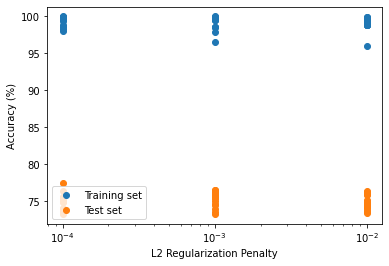

In [71]:
plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('L2 Regularization Penalty')
plt.ylabel('Accuracy (%)')
plt.xscale('log')

Text(0, 0.5, 'Accuracy (%)')

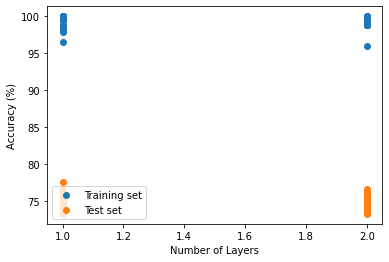

In [74]:
plt.scatter(number_layers_list, train_acc_list, label='Training set')
plt.scatter(number_layers_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

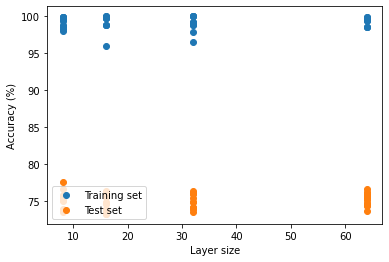

In [75]:
plt.scatter(layer_size_list, train_acc_list, label='Training set')
plt.scatter(layer_size_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Layer size')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

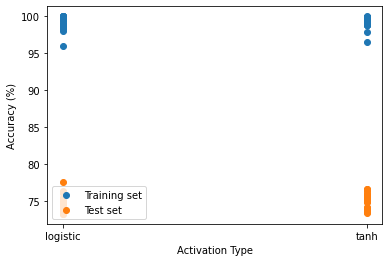

In [76]:
plt.scatter(activation_list, train_acc_list, label='Training set')
plt.scatter(activation_list, test_acc_list, label='Test set')
plt.legend(loc='lower left')
plt.xlabel('Activation Type')
plt.ylabel('Accuracy (%)')

In [77]:
max_index = np.argmax(test_acc_list)

print('Alpha: ' + str(alpha_list[max_index]))
print('Number of Layers: ' + str(number_layers_list[max_index]))
print('Layer Size: ' + str(layer_size_list[max_index]))
print('Activation type: ' + str(activation_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Alpha: 0.0001
Number of Layers: 1
Layer Size: 8
Activation type: logistic
Training accuracy: 98.0%
Test accuracy: 77.5%


# K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
def evaluate_knn(train_x, train_y, test_x, test_y, hyperparameters_dic, results_knn):
    
    neighbors_list = hyperparameters_dic['neighbors_list']
    weights_list = hyperparameters_dic['weights_list']
    
    i = len(list(results_knn.keys()))
    
    n_models = len(neighbors_list)*len(weights_list)
    
    for neighbors in neighbors_list:
        for weights in weights_list:
            
            print('Training model {} of {}...'.format(i+1, n_models))
            
            for r_i in list(results_knn.keys()):
                if neighbors == results_knn[r_i][0]:
                    if weights == results_knn[r_i][1]:
                        continue
            
            results_knn[i] = []
            
            model = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
            
            model.fit(train_x, train_y)
            
            train_accuracy = model.score(train_x, train_y)
            test_accuracy = model.score(test_x, test_y)
            
            results_knn[i].append(neighbors)
            results_knn[i].append(weights)
            results_knn[i].append(train_accuracy)
            results_knn[i].append(test_accuracy)
            
            i += 1
            
    return results_knn

In [24]:
neighbors_list = [3, 5, 7]
weights_list = ['uniform', 'distance']

hyperparameter_dic = {'neighbors_list': neighbors_list, 'weights_list': weights_list}

results_knn = evaluate_knn(train_x, train_y, test_x, test_y, hyperparameter_dic, {})

Training model 1 of 6...
Training model 2 of 6...
Training model 3 of 6...
Training model 4 of 6...
Training model 5 of 6...
Training model 6 of 6...


In [25]:
for key in results_knn.keys():
    print('Number nerighbors: ' + str(results_knn[key][0]))
    print('Weighting: ' + str(results_knn[key][1]))
    print('Training accuracy: ' + str(results_knn[key][2]))
    print('Test accuracy: ' + str(results_knn[key][3]))
    print()

Number nerighbors: 3
Weighting: uniform
Training accuracy: 0.8666666666666667
Test accuracy: 0.758988015978695

Number nerighbors: 3
Weighting: distance
Training accuracy: 1.0
Test accuracy: 0.7656458055925432

Number nerighbors: 5
Weighting: uniform
Training accuracy: 0.828
Test accuracy: 0.7416777629826897

Number nerighbors: 5
Weighting: distance
Training accuracy: 1.0
Test accuracy: 0.7576564580559254

Number nerighbors: 7
Weighting: uniform
Training accuracy: 0.803
Test accuracy: 0.7443408788282291

Number nerighbors: 7
Weighting: distance
Training accuracy: 1.0
Test accuracy: 0.7603195739014648



In [26]:
save_results(results_knn, 'results_knn')

In [78]:
results_knn = load_results('results_knn.json')

In [79]:
neighbors_list = [results_knn[i][0] for i in list(results_knn.keys())]
weights_list = [results_knn[i][1] for i in list(results_knn.keys())]
train_acc_list = [results_knn[i][2]*100 for i in list(results_knn.keys())]
test_acc_list = [results_knn[i][3]*100 for i in list(results_knn.keys())]

neighboars_list, train_acc_list, test_acc_list, weights_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list, weights_list)))

Text(0, 0.5, 'Accuracy (%)')

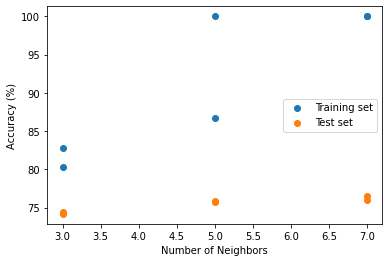

In [80]:
plt.scatter(neighbors_list, train_acc_list, label='Training set')
plt.scatter(neighbors_list, test_acc_list, label='Test set')
plt.legend(loc='center right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

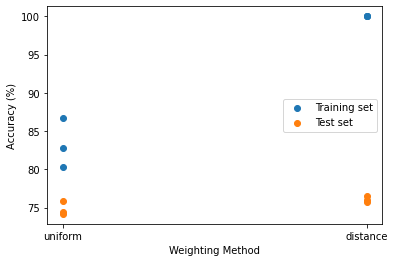

In [81]:
plt.scatter(weights_list, train_acc_list, label='Training set')
plt.scatter(weights_list, test_acc_list, label='Test set')
plt.legend(loc='center right')
plt.xlabel('Weighting Method')
plt.ylabel('Accuracy (%)')

In [82]:
max_index = np.argmax(test_acc_list)

print('Number of Neighbors: ' + str(neighbors_list[max_index]))
print('Weighting Methond: ' + str(weights_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Number of Neighbors: 7
Weighting Methond: distance
Training accuracy: 100.0%
Test accuracy: 76.56%


# Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
def evaluate_gbc(train_x, train_y, test_x, test_y, hyperparameters_dic, results_gbc):
    
    alphas = hyperparameters_dic['alphas']
    
    i = len(list(results_gbc.keys()))
    
    n_models = len(alphas)
    
    for alpha in alphas:
            
        print('Training model {} of {}...'.format(i+1, n_models))

        if alpha in [results_gbc[i][0] for i in list(results_gbc.keys())]:
            continue
            
        results_gbc[i] = []

        model = GradientBoostingClassifier(ccp_alpha = alpha)

        model.fit(train_x, train_y)

        train_accuracy = model.score(train_x, train_y)
        test_accuracy = model.score(test_x, test_y)

        results_gbc[i].append(alpha)
        results_gbc[i].append(train_accuracy)
        results_gbc[i].append(test_accuracy)

        i += 1
            
    return results_gbc

In [29]:
alphas = [0.01, 0.001, 0.0001, 0]

hyperparameters_dic = {'alphas': alphas}

results_gbc = evaluate_gbc(train_x, train_y, test_x, test_y, hyperparameters_dic, {})

Training model 1 of 4...
Training model 2 of 4...
Training model 3 of 4...
Training model 4 of 4...


In [30]:
for key in results_gbc.keys():
    print('Alphas: ' + str(results_gbc[key][0]))
    print('Training accuracy: ' + str(results_gbc[key][1]))
    print('Test accuracy: ' + str(results_gbc[key][2]))
    print()

Alphas: 0.01
Training accuracy: 0.7386666666666667
Test accuracy: 0.729693741677763

Alphas: 0.001
Training accuracy: 0.793
Test accuracy: 0.7576564580559254

Alphas: 0.0001
Training accuracy: 0.8593333333333333
Test accuracy: 0.7842876165113183

Alphas: 0
Training accuracy: 0.861
Test accuracy: 0.7869507323568575



In [31]:
save_results(results_gbc, 'results_gbc')

In [83]:
results_gbc = load_results('results_gbc.json')

In [84]:
alpha_list = [results_gbc[i][0] for i in list(results_gbc.keys())]
train_acc_list = [results_gbc[i][1]*100 for i in list(results_gbc.keys())]
test_acc_list = [results_gbc[i][2]*100 for i in list(results_gbc.keys())]

Text(0, 0.5, 'Accuracy (%)')

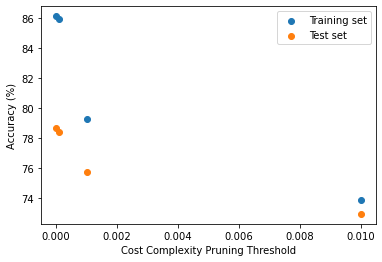

In [85]:
alpha_list = [results_gbc[i][0] for i in list(results_gbc.keys())]
train_acc_list = [results_gbc[i][1]*100 for i in list(results_gbc.keys())]
test_acc_list = [results_gbc[i][2]*100 for i in list(results_gbc.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='upper right')
plt.xlabel('Cost Complexity Pruning Threshold')
plt.ylabel('Accuracy (%)')
#plt.xscale('log')

In [86]:
max_index = np.argmax(test_acc_list)

print('Alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Alpha: 0
Training accuracy: 86.1%
Test accuracy: 78.7%


# Support Vector Machine

In [32]:
from sklearn.svm import SVC

In [33]:
def evaluate_svm(train_x, train_y, test_x, test_y, hyperparameters_dic, results_svm):
    
    alphas = hyperparameters_dic['alphas']
    
    i = len(list(results_svm.keys()))
    
    n_models = len(alphas)
    
    for alpha in alphas:
            
        print('Training model {} of {}...'.format(i+1, n_models))

        if alpha in [results_svm[i][0] for i in list(results_svm.keys())]:
            continue
            
        results_svm[i] = []

        model = SVC(C = alpha)

        model.fit(train_x, train_y)

        train_accuracy = model.score(train_x, train_y)
        test_accuracy = model.score(test_x, test_y)

        results_svm[i].append(alpha)
        results_svm[i].append(train_accuracy)
        results_svm[i].append(test_accuracy)

        i += 1
            
    return results_svm

In [34]:
alphas = [0.01, 0.1, 1, 10, 100]

hyperparameters_dic = {'alphas': alphas}

results_svm = evaluate_svm(train_x, train_y, test_x, test_y, hyperparameters_dic, {})

Training model 1 of 5...
Training model 2 of 5...
Training model 3 of 5...
Training model 4 of 5...
Training model 5 of 5...


In [35]:
for key in results_svm.keys():
    print('Alphas: ' + str(results_svm[key][0]))
    print('Training accuracy: ' + str(results_svm[key][1]))
    print('Test accuracy: ' + str(results_svm[key][2]))
    print()

Alphas: 0.01
Training accuracy: 0.5423333333333333
Test accuracy: 0.5419440745672437

Alphas: 0.1
Training accuracy: 0.716
Test accuracy: 0.6844207723035952

Alphas: 1
Training accuracy: 0.8486666666666667
Test accuracy: 0.7869507323568575

Alphas: 10
Training accuracy: 0.9453333333333334
Test accuracy: 0.7882822902796272

Alphas: 100
Training accuracy: 0.9896666666666667
Test accuracy: 0.7683089214380826



In [36]:
save_results(results_svm, 'results_svm')

In [89]:
results_svm = load_results('results_svm.json')

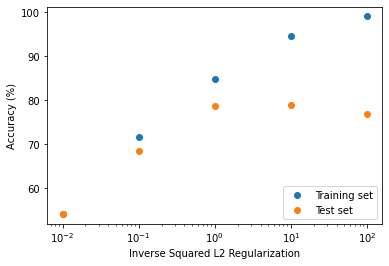

In [95]:
alpha_list = [results_svm[i][0] for i in list(results_svm.keys())]
train_acc_list = [results_svm[i][1]*100 for i in list(results_svm.keys())]
test_acc_list = [results_svm[i][2]*100 for i in list(results_svm.keys())]

alpha_list, train_acc_list, test_acc_list = zip(*sorted(zip(alpha_list, train_acc_list, test_acc_list)))

plt.scatter(alpha_list, train_acc_list, label='Training set')
plt.scatter(alpha_list, test_acc_list, label='Test set')
plt.legend(loc='lower right')
plt.xlabel('Inverse Squared L2 Regularization')
plt.ylabel('Accuracy (%)')
plt.xscale('log')

In [94]:
max_index = np.argmax(test_acc_list)

print('Alpha: ' + str(alpha_list[max_index]))
print('Training accuracy: ' + str(round(train_acc_list[max_index], 2)) + '%')
print('Test accuracy: ' + str(round(test_acc_list[max_index], 2)) + '%')

Alpha: 10
Training accuracy: 94.53%
Test accuracy: 78.83%
